In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Function Definitions

In [2]:
# Base Model Paths
base_model_paths = {
    'metrics_all': './initial_results/metrics_all.csv',
    'metrics_c': './initial_results/metrics_c.csv',
    'metrics_s': './initial_results/metrics_s.csv',
    'metrics_v': './initial_results/metrics_v.csv'
}

# Augmented Model Paths
augmented_model_paths = {
    'metrics_all': './augmented_results/metrics_all.csv',
    'metrics_c': './augmented_results/metrics_c.csv',
    'metrics_s': './augmented_results/metrics_s.csv',
    'metrics_v': './augmented_results/metrics_v.csv'
}

In [3]:
# Function to plot Precision-Recall curve
def plot_precision_recall(data, title):
    plt.figure(figsize=(8, 6))
    for iou in sorted(data['iou'].unique()):
        subset = data[data['iou'] == iou]
        plt.plot(subset['r'], subset['p'], label=f'IoU={iou:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

In [4]:
# Function to plot mAP heatmaps
def plot_map_heatmap(data, title, metric):
    pivot_table = data.pivot(index='iou', columns='conf', values=metric)
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="viridis")
    plt.title(f'{title}: {metric}')
    plt.xlabel('Confidence Threshold')
    plt.ylabel('IoU Threshold')
    plt.show()

In [5]:
# Function to plot 3D Surface
def plot_3d_surface(data, title, metric):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    X, Y = data['conf'], data['iou']
    Z = data[metric]

    sc = ax.scatter(X, Y, Z, c=Z, cmap=cm.viridis)
    ax.set_xlabel('Confidence')
    ax.set_ylabel('IoU')
    ax.set_zlabel(metric)
    ax.set_title(f'{title}: {metric}')
    plt.colorbar(sc)
    plt.show()

In [6]:
# Plots the metrics against Iou and Confidence
def plot_metric_against_iou_conf(data, title, metric):
    # Plot metric against IoU for different confidence levels
    plt.figure(figsize=(8, 6))
    for conf in sorted(data['conf'].unique()):
        subset = data[data['conf'] == conf]
        plt.plot(subset['iou'], subset[metric], label=f'Conf={conf:.2f}')
    plt.xlabel('IoU Threshold')
    plt.ylabel(metric)
    plt.title(f'{title} - {metric} vs IoU')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot metric against Confidence for different IoU levels
    plt.figure(figsize=(8, 6))
    for iou in sorted(data['iou'].unique()):
        subset = data[data['iou'] == iou]
        plt.plot(subset['conf'], subset[metric], label=f'IoU={iou:.2f}')
    plt.xlabel('Confidence Threshold')
    plt.ylabel(metric)
    plt.title(f'{title} - {metric} vs Confidence')
    plt.legend()
    plt.grid(True)
    plt.show()

In [7]:
# Function to run visualizations on results
def load_and_visualize(base_paths, title_prefix):
    
    # Load CSV files
    metrics_all = pd.read_csv(base_paths['metrics_all'])
    metrics_c = pd.read_csv(base_paths['metrics_c'])
    metrics_s = pd.read_csv(base_paths['metrics_s'])
    metrics_v = pd.read_csv(base_paths['metrics_v'])

    # Create a dictionary to organize the data
    data_dict = {
        'All Classes': metrics_all,
        'Class C': metrics_c,
        'Class S': metrics_s,
        'Class V': metrics_v
    }

    # Visualize each dataset
    results_summary = []
    for name, data in data_dict.items():
        print(f"Visualizing for {title_prefix} - {name}")
        plot_precision_recall(data, f'{title_prefix} - {name} - Precision-Recall Curve')
        plot_map_heatmap(data, f'{title_prefix} - {name}', 'map50')
        plot_map_heatmap(data, f'{title_prefix} - {name}', 'map50-95')
        plot_3d_surface(data, f'{title_prefix} - {name}', 'map50')
        plot_3d_surface(data, f'{title_prefix} - {name}', 'map50-95')
        for metric in ['p', 'r', 'map50', 'map50-95']:
            plot_metric_against_iou_conf(data, f'{title_prefix} - {name}', metric)
        # Collect average metrics for summary
        avg_metrics = data[['p', 'r', 'map50', 'map50-95']].mean().to_dict()
        avg_metrics['Model'] = title_prefix
        avg_metrics['Class'] = name
        results_summary.append(avg_metrics)

    return pd.DataFrame(results_summary)

# Visualising Initial Model

Visualizing for Base Model - All Classes


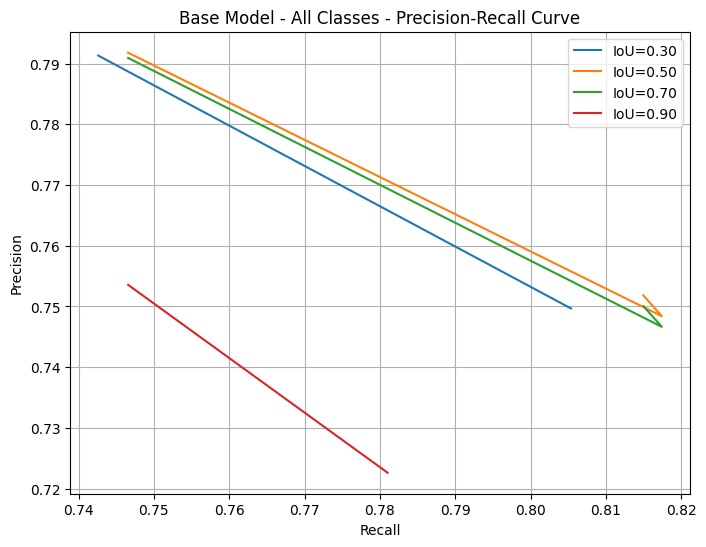

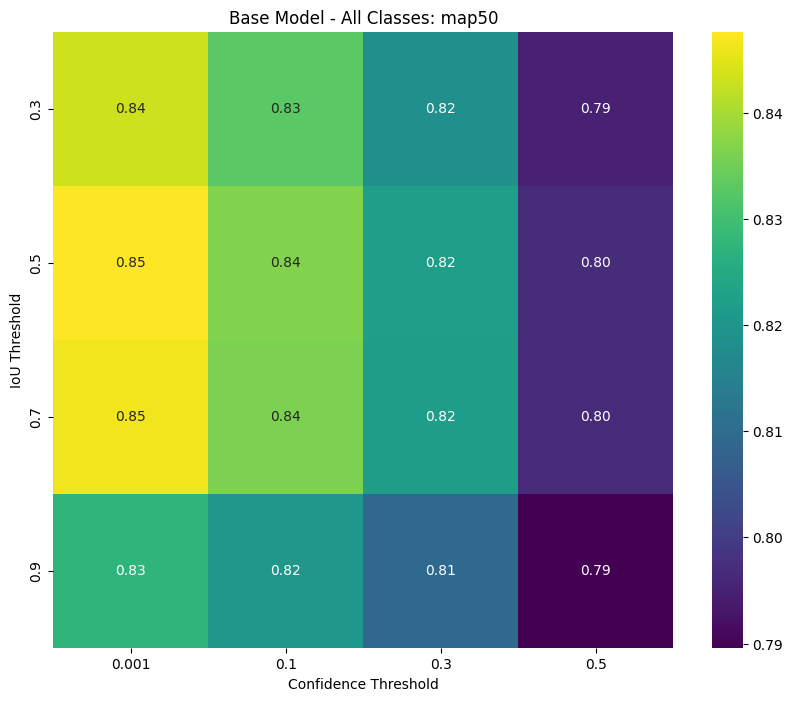

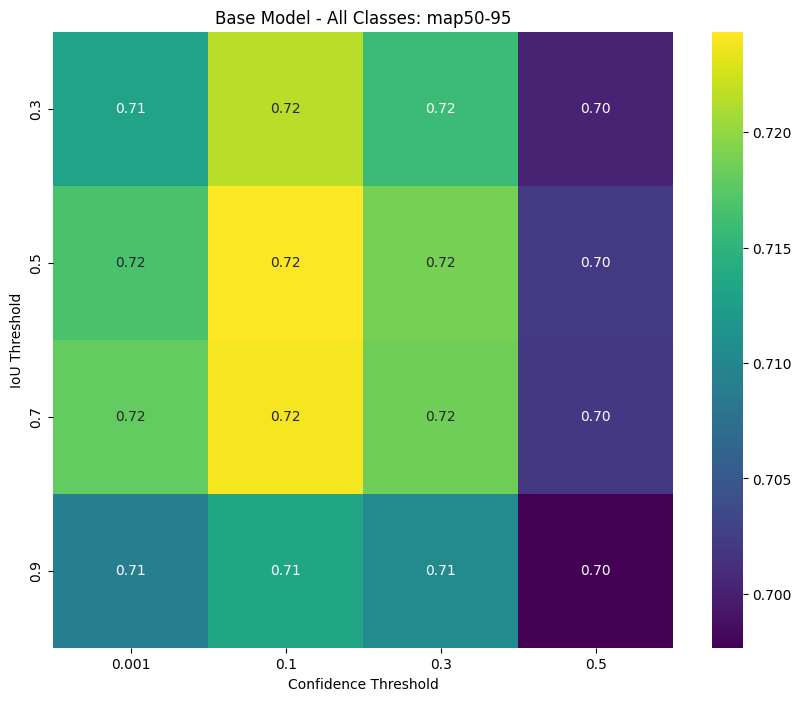

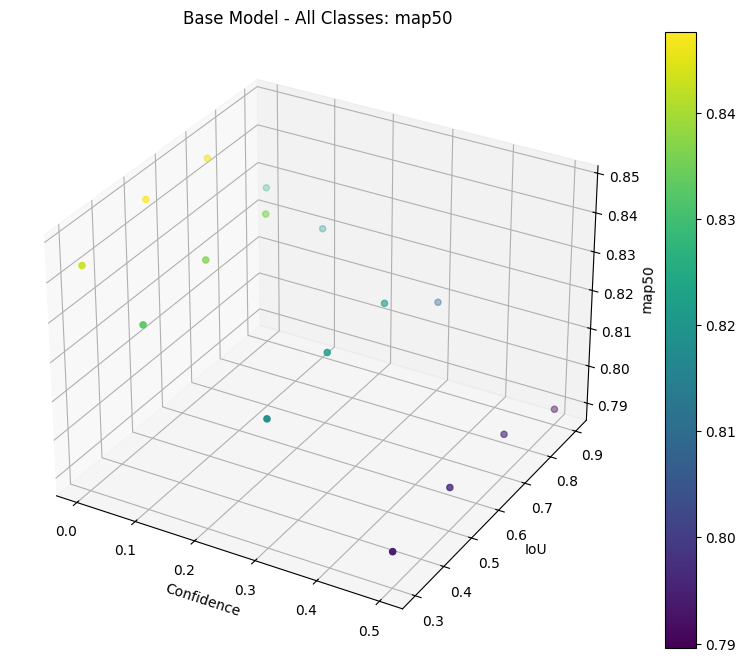

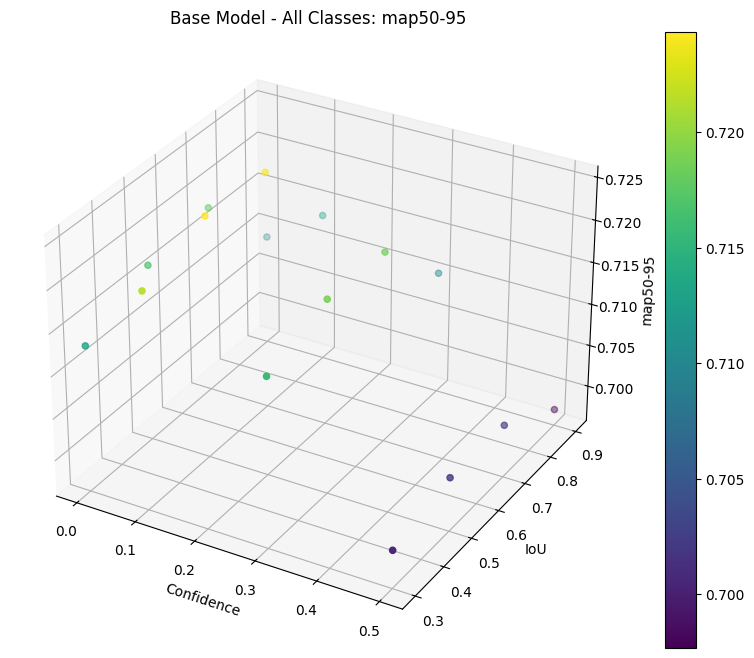

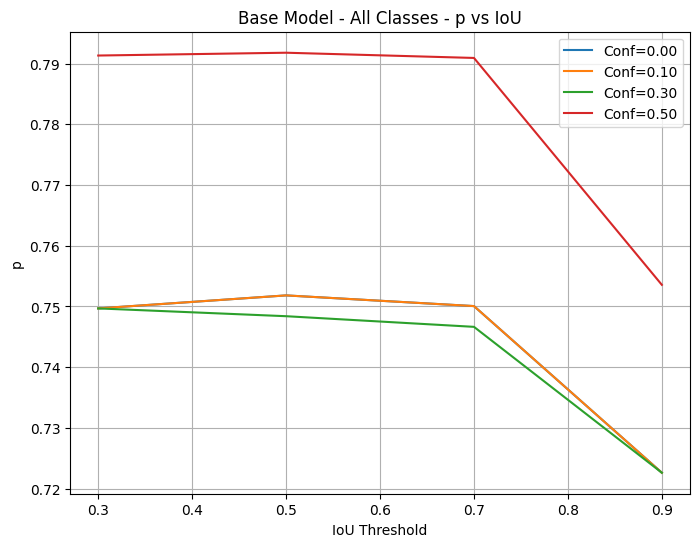

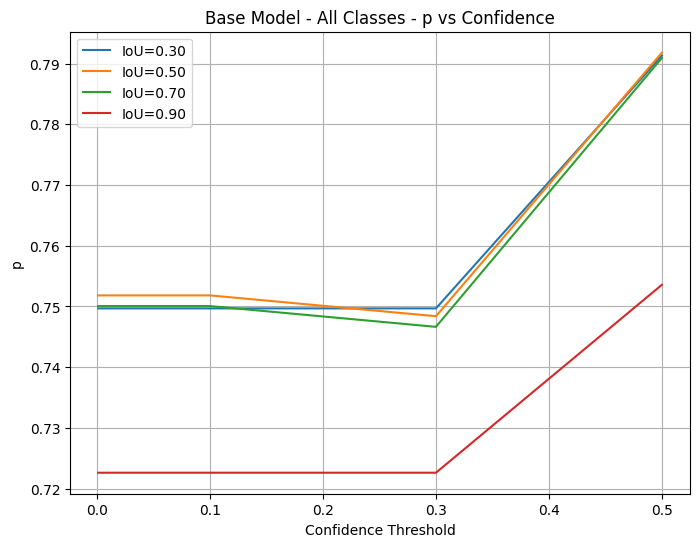

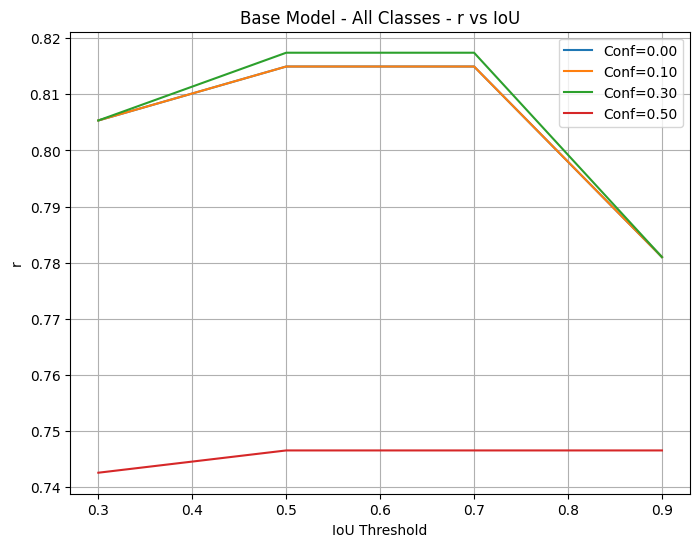

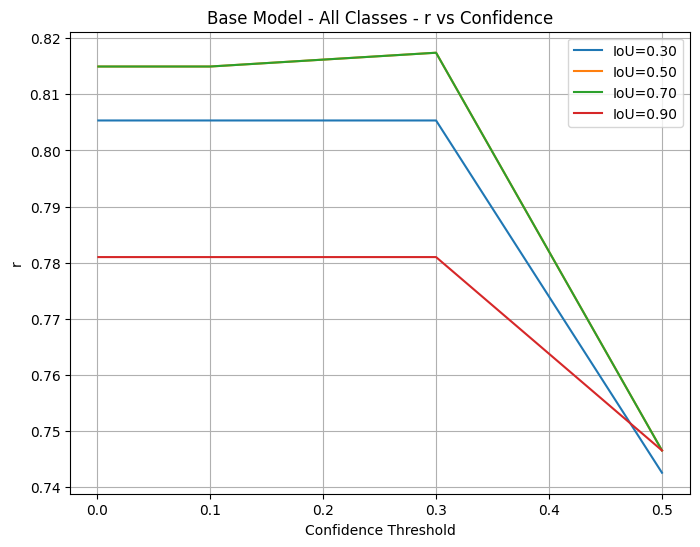

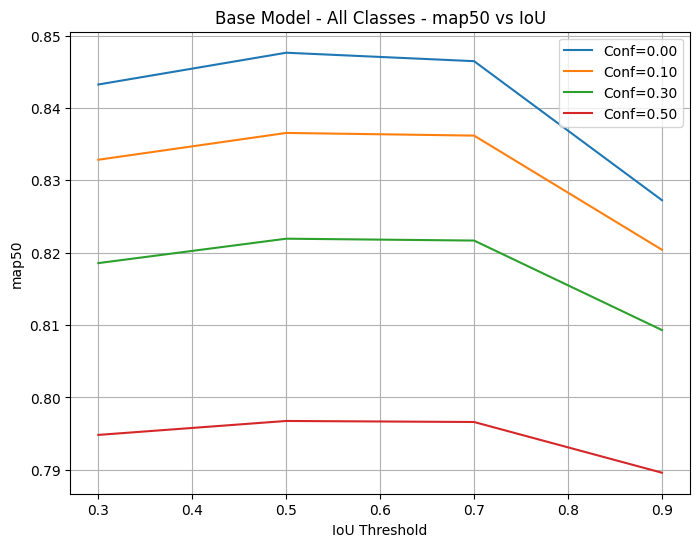

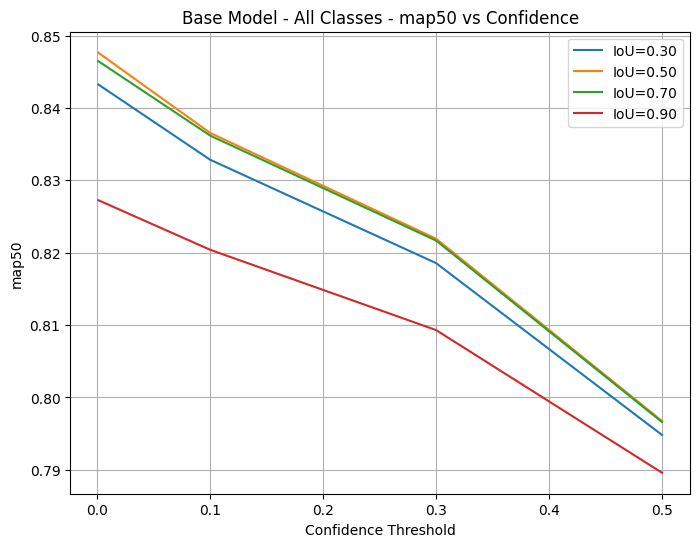

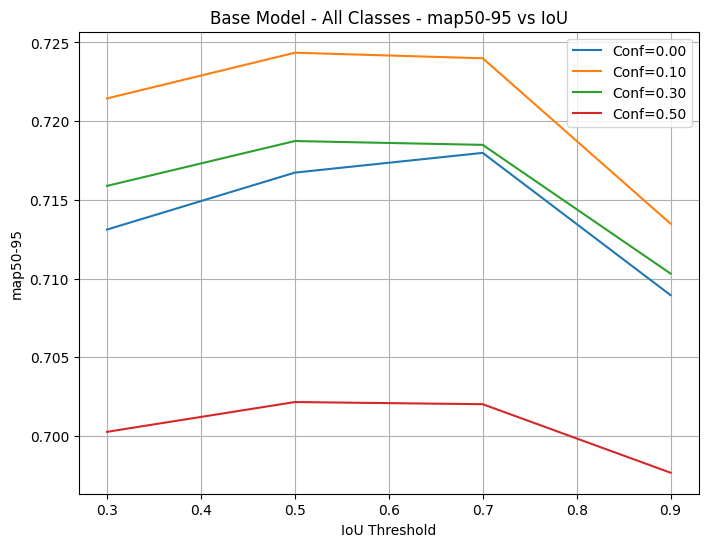

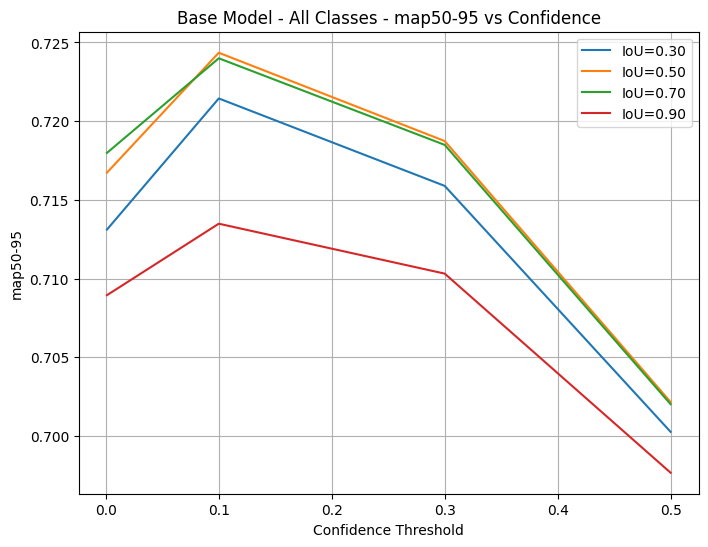

Visualizing for Base Model - Class C


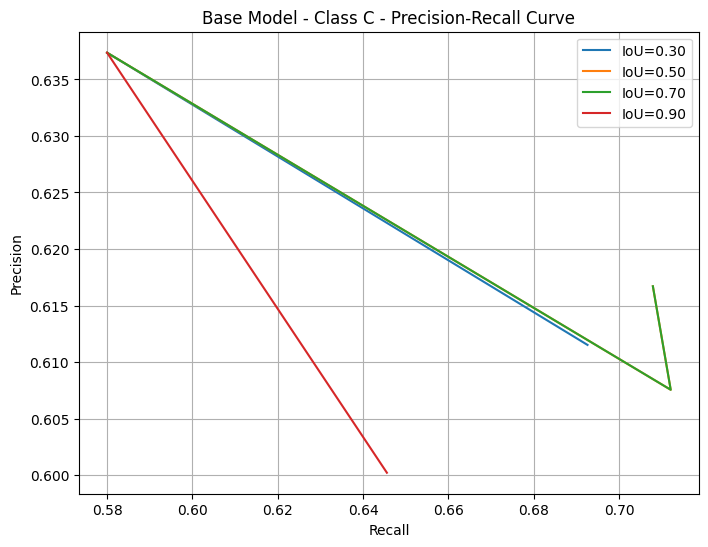

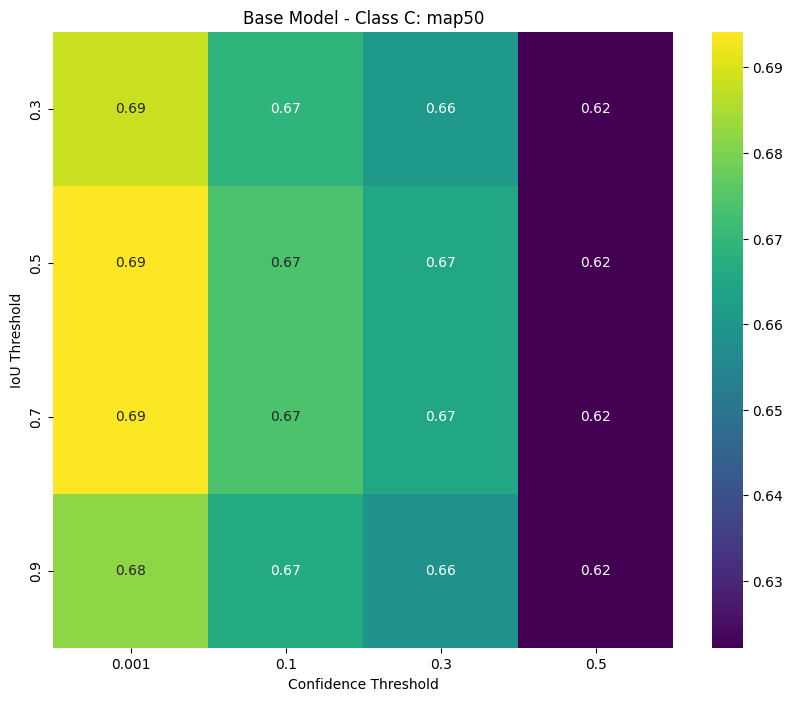

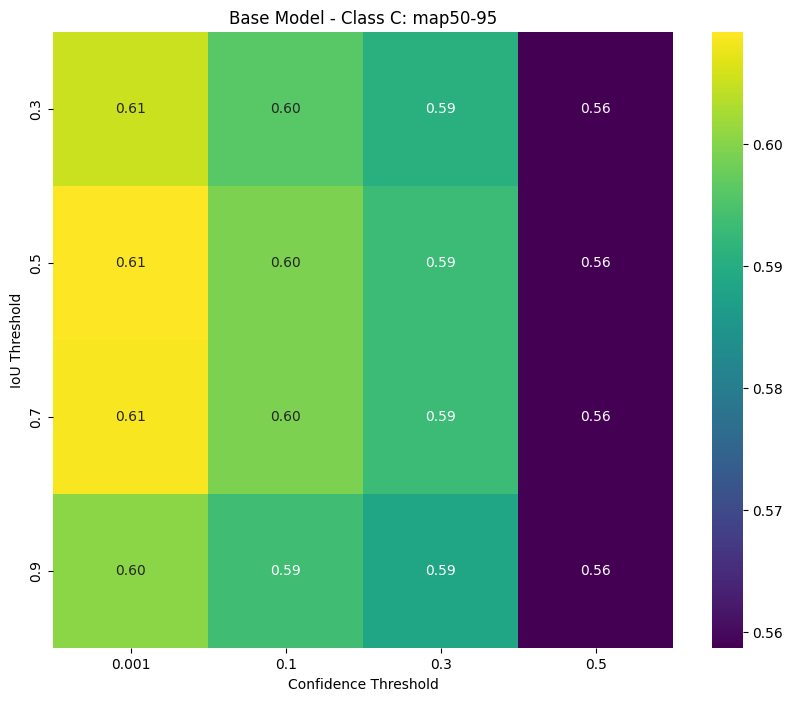

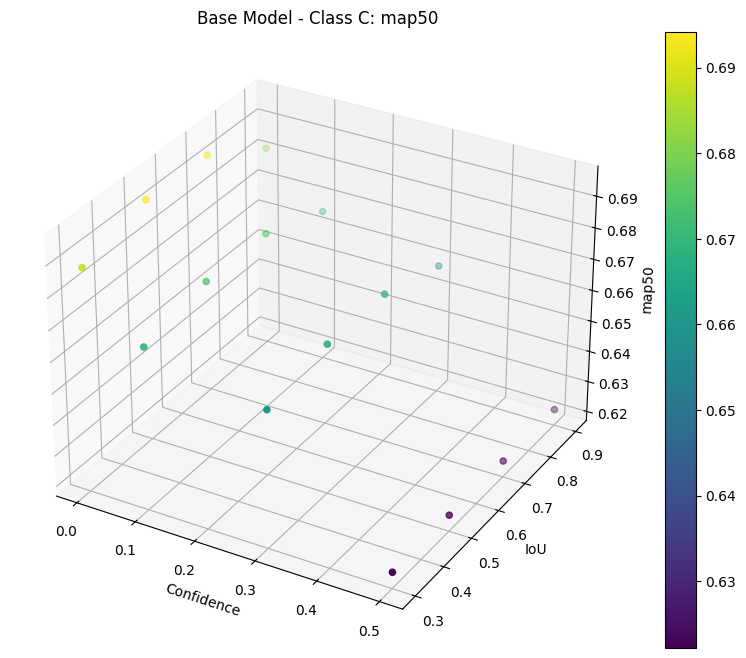

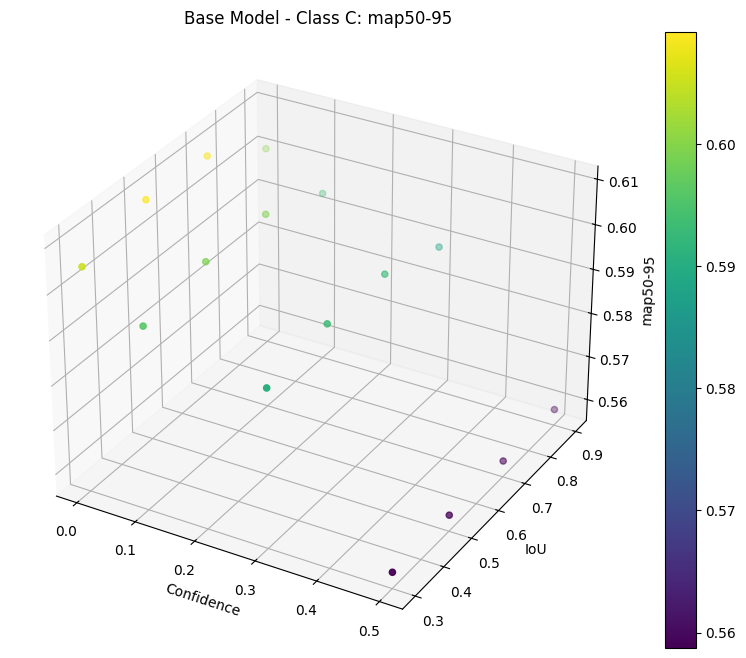

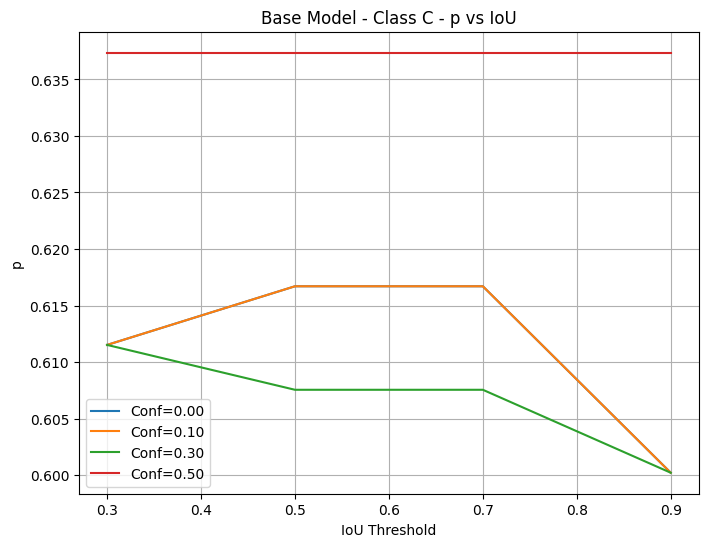

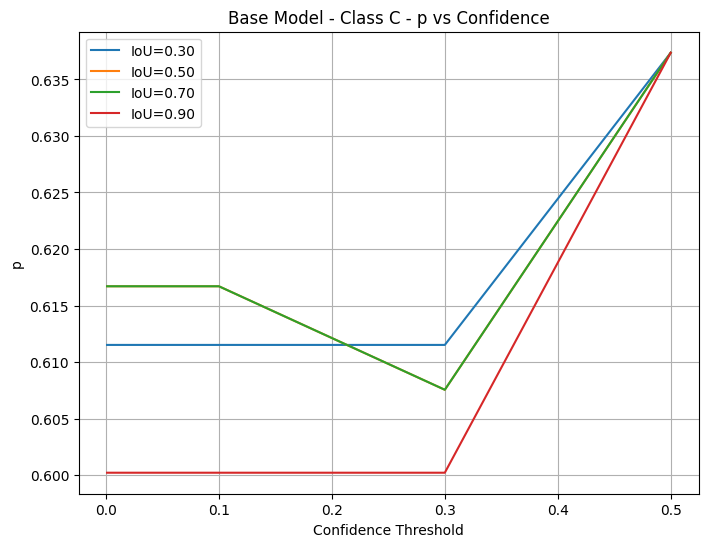

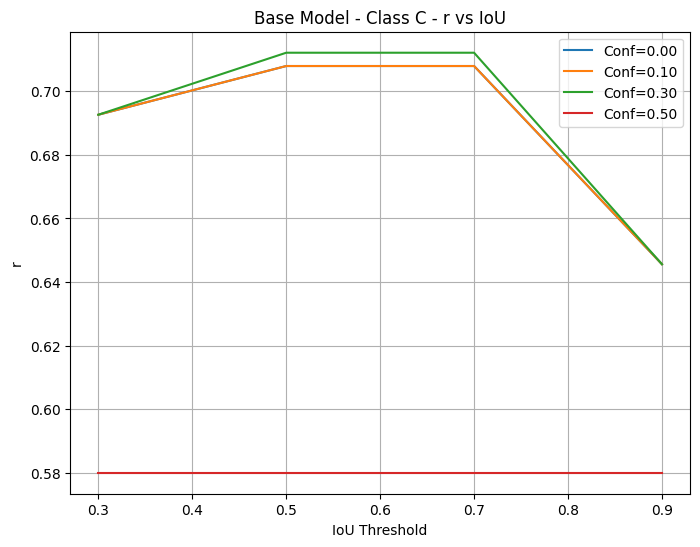

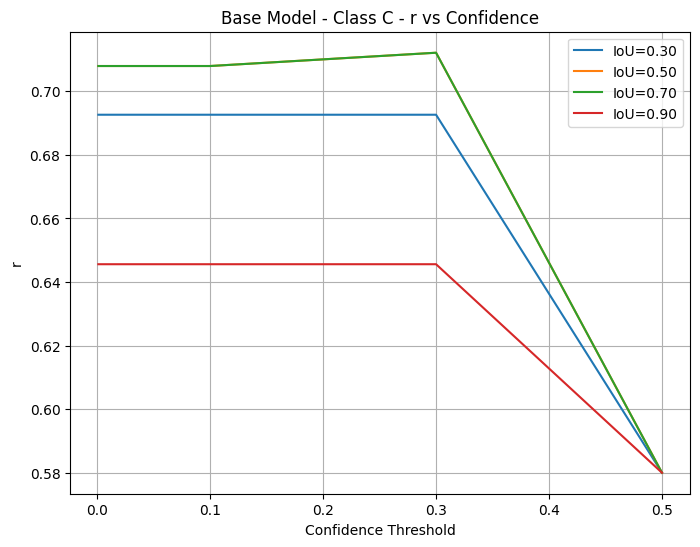

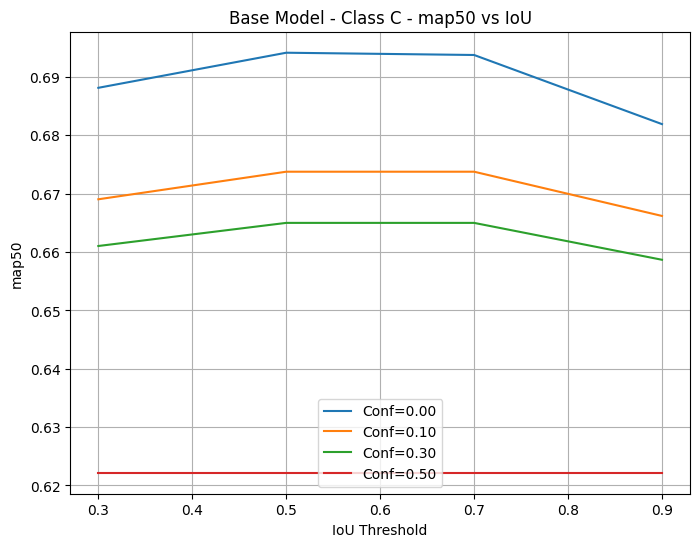

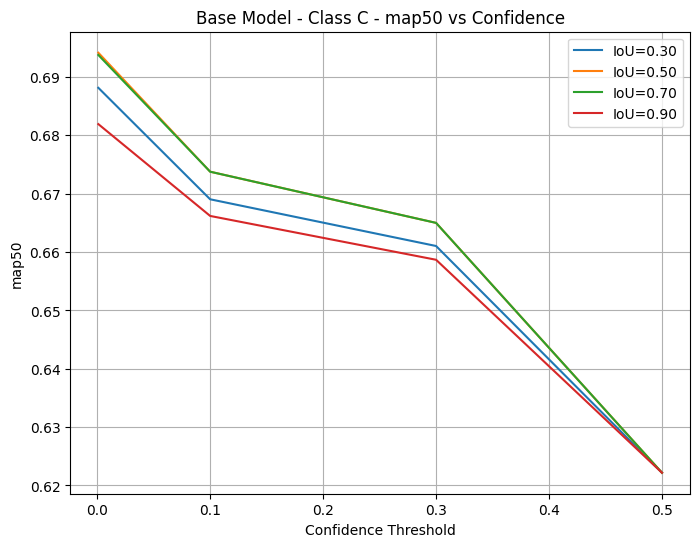

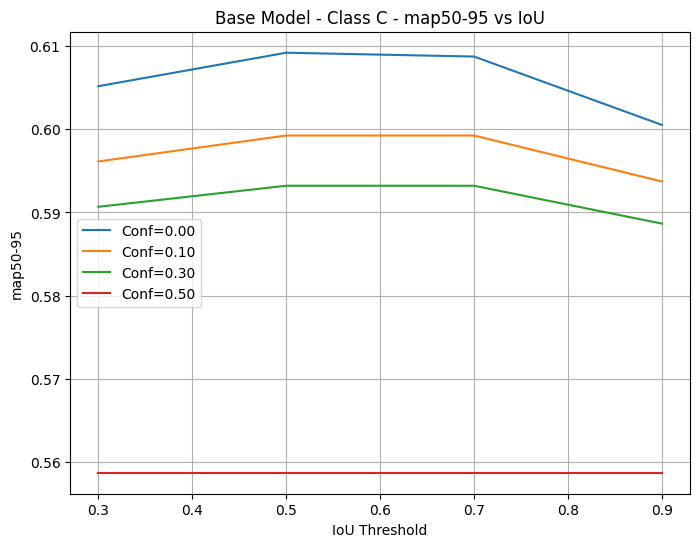

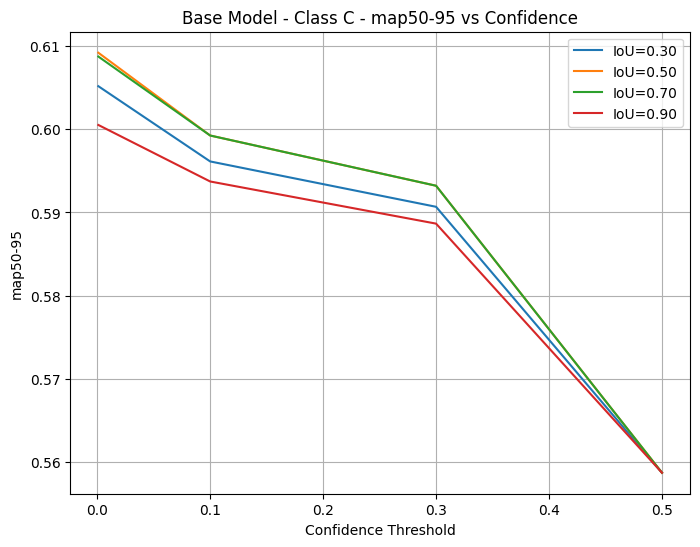

Visualizing for Base Model - Class S


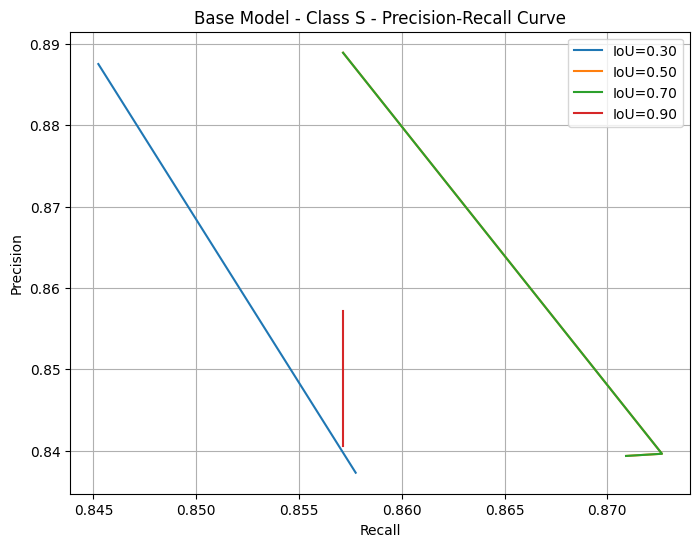

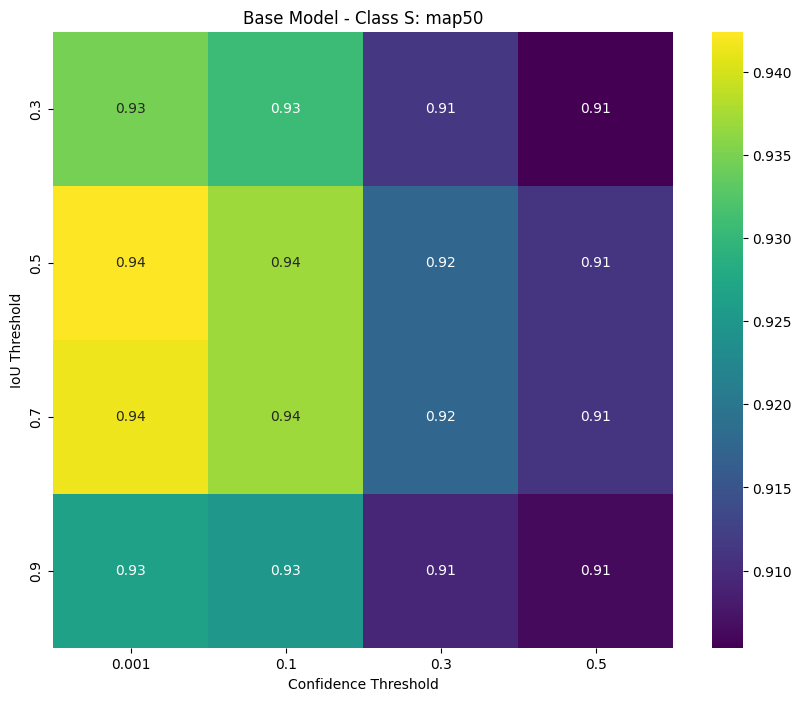

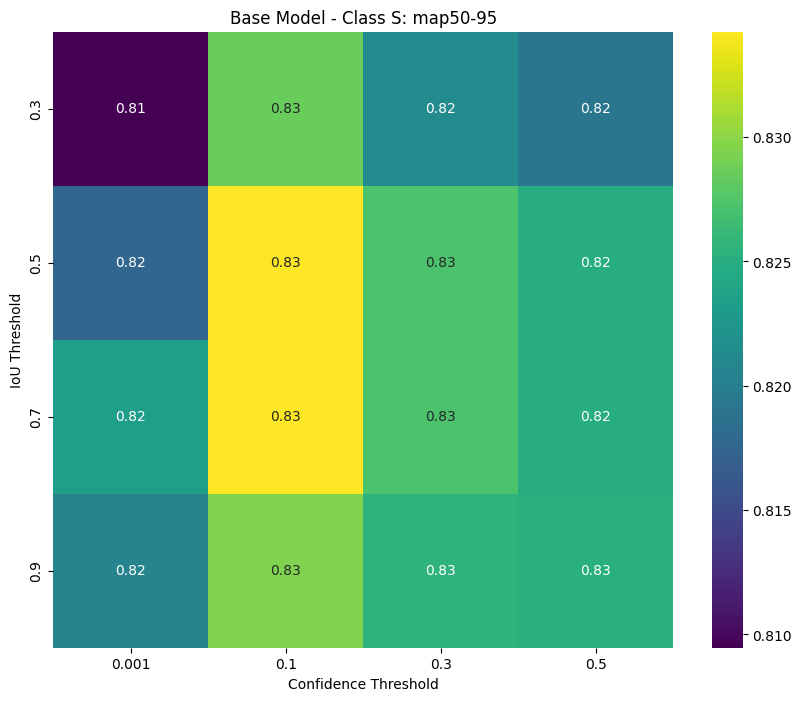

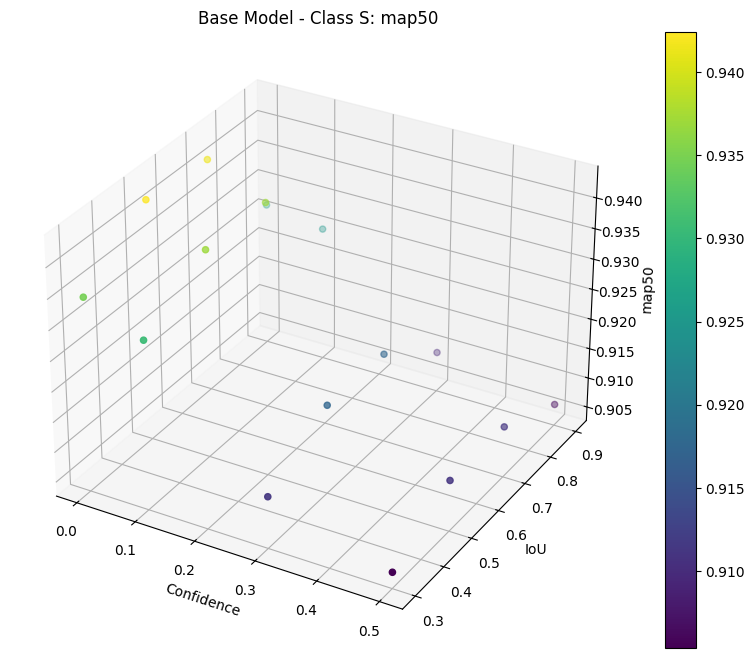

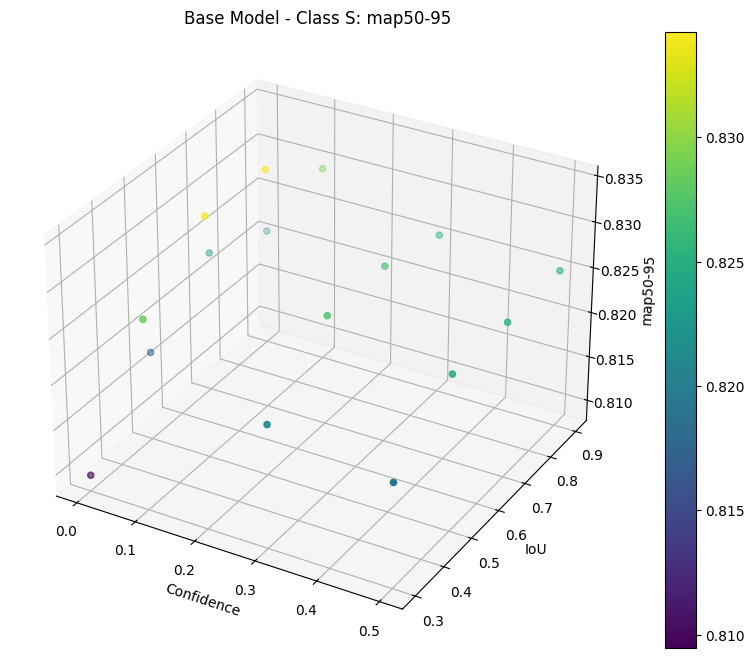

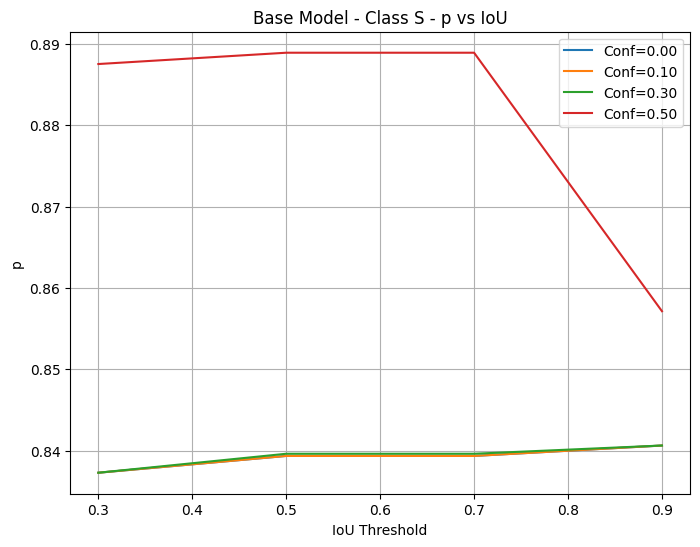

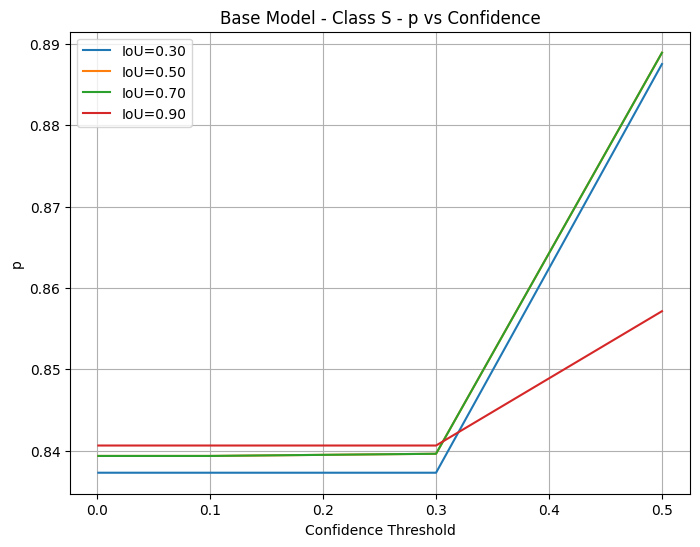

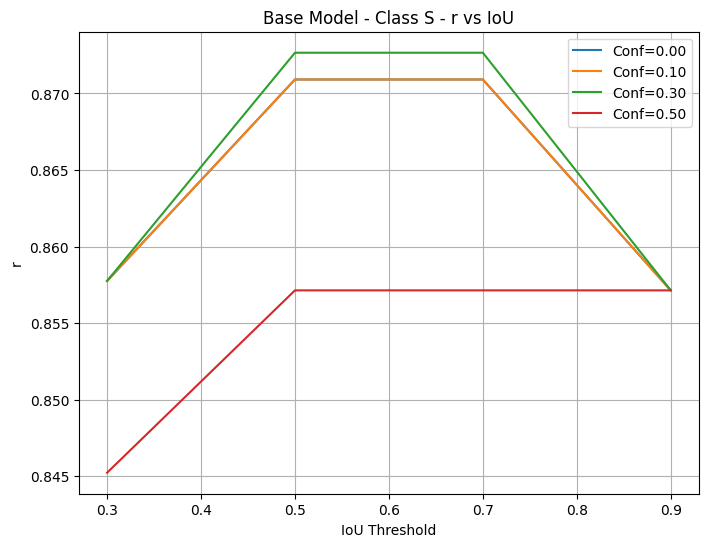

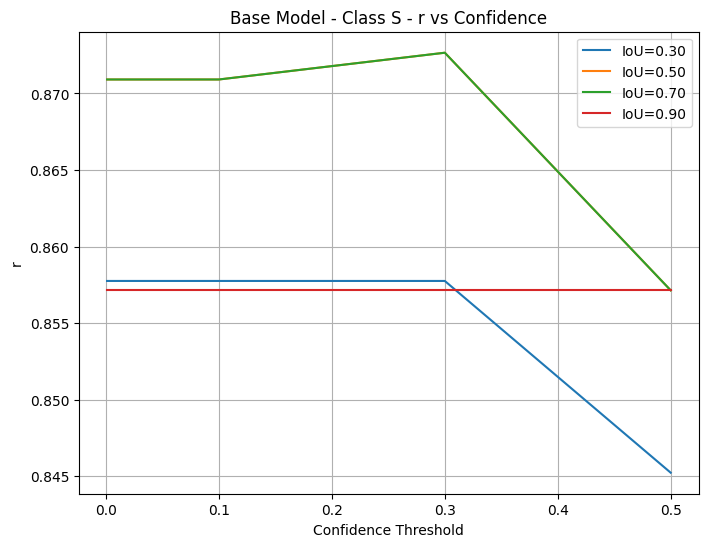

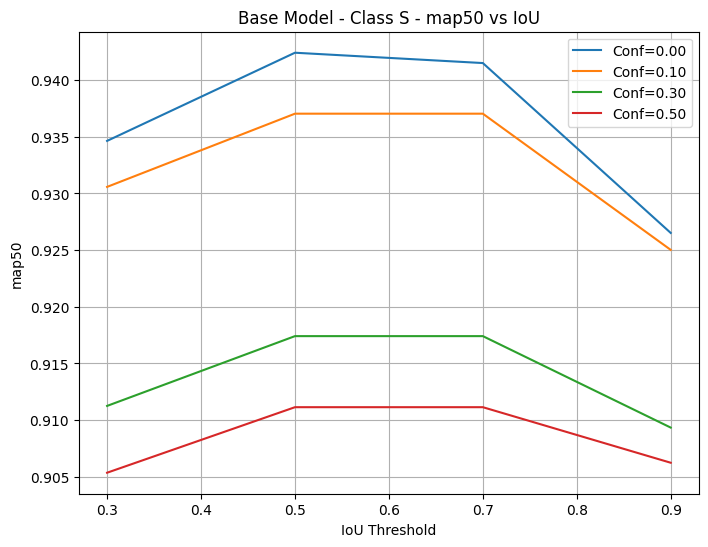

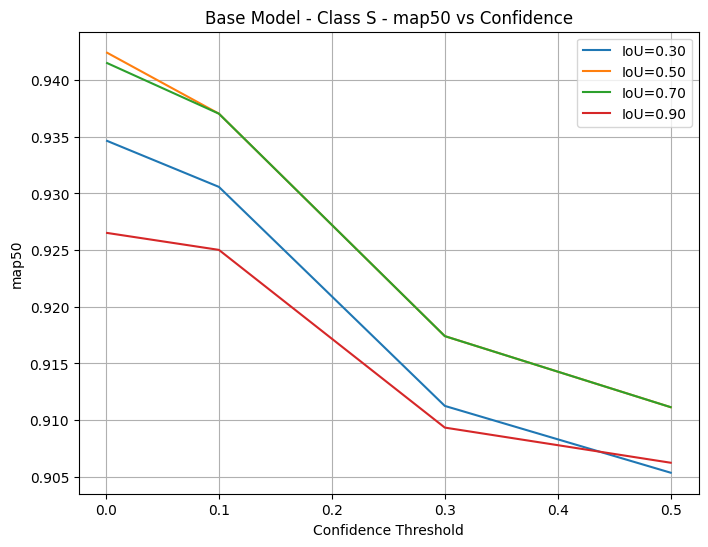

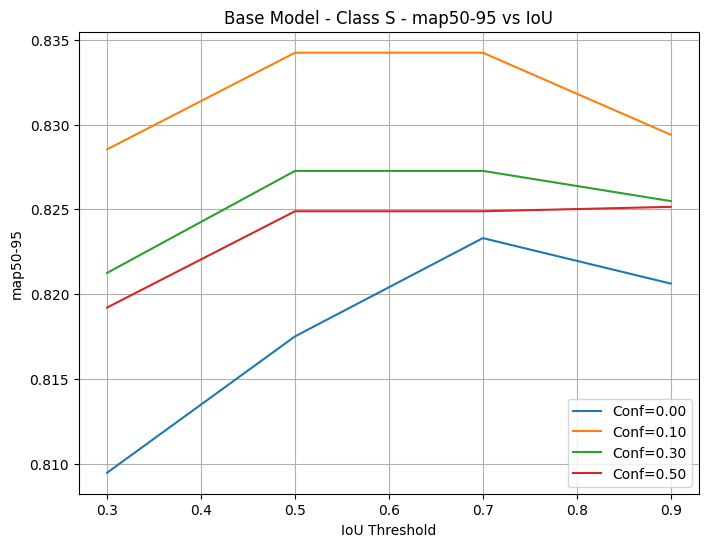

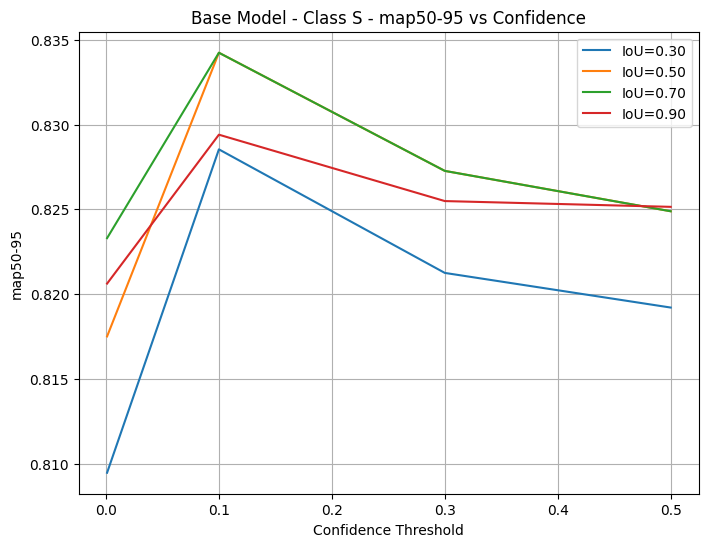

Visualizing for Base Model - Class V


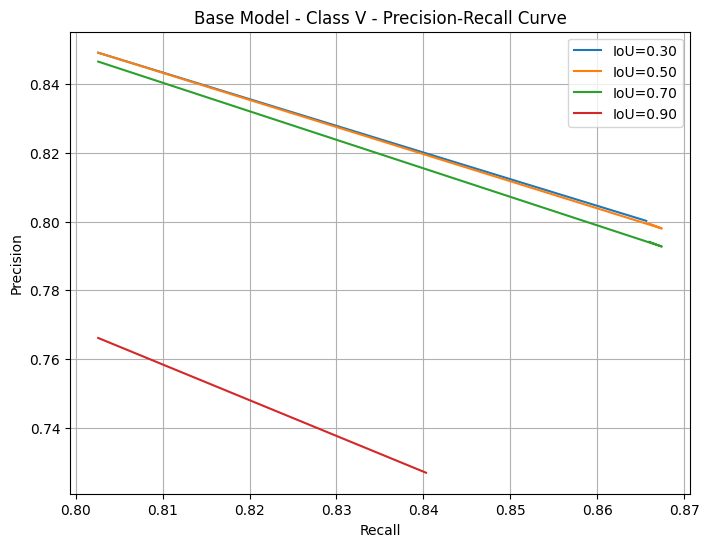

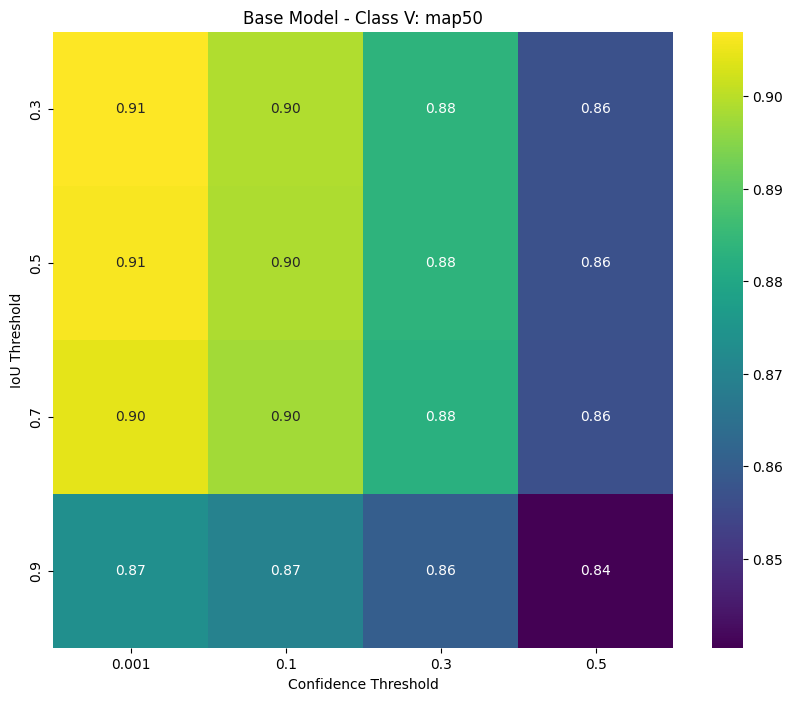

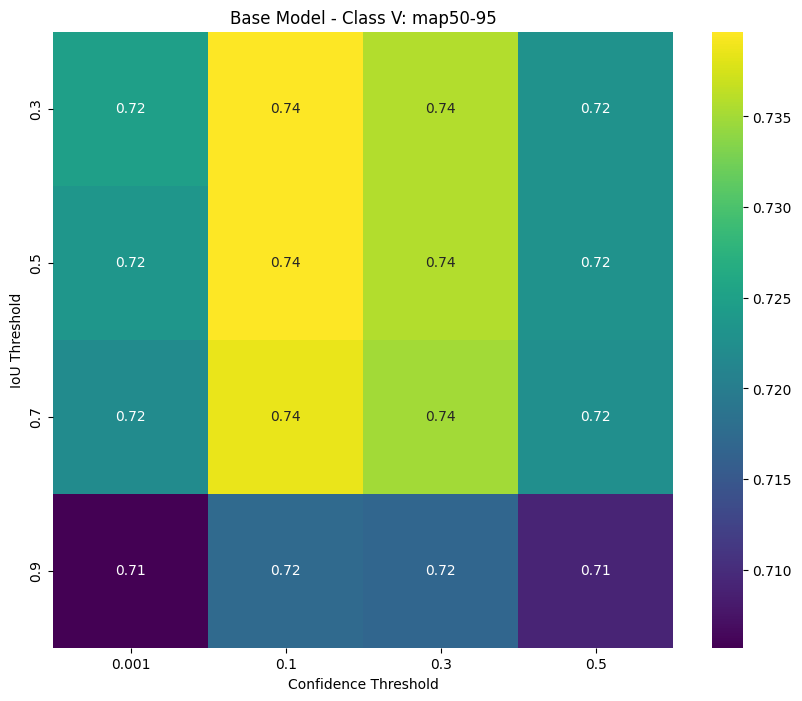

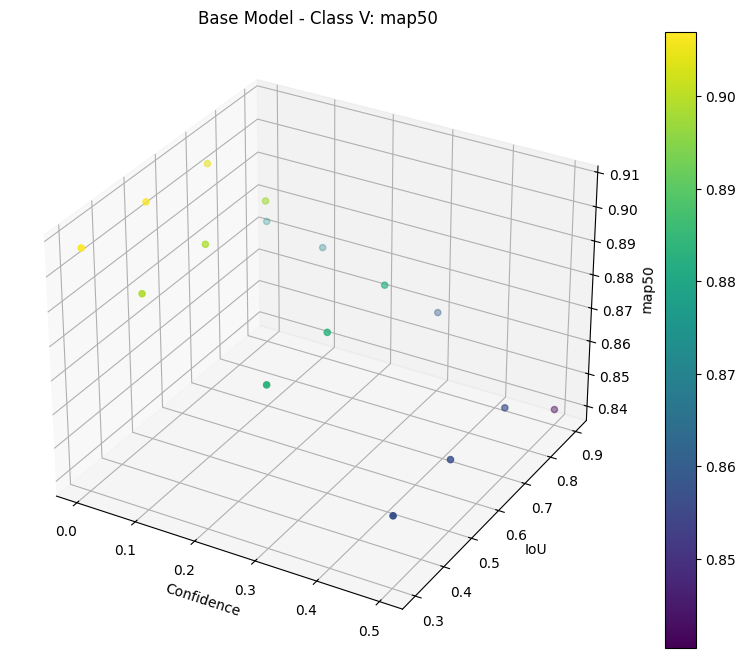

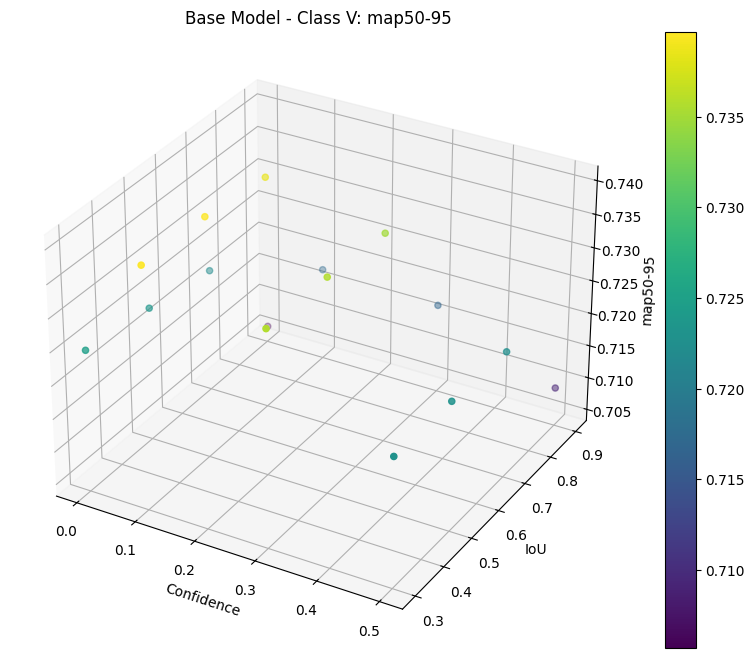

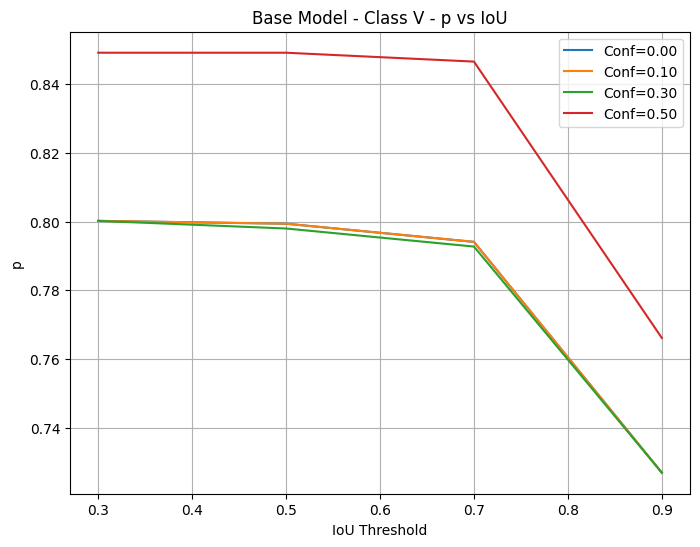

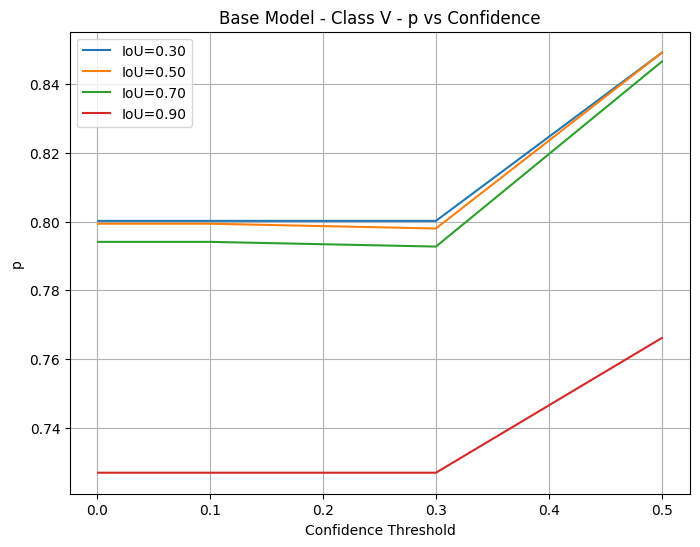

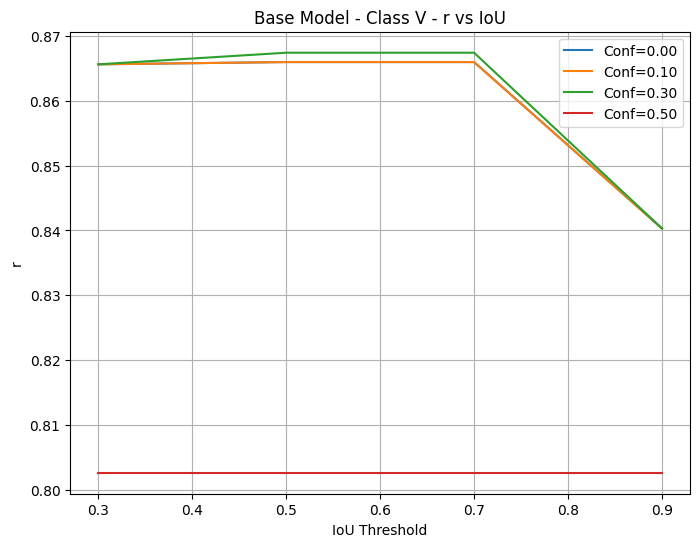

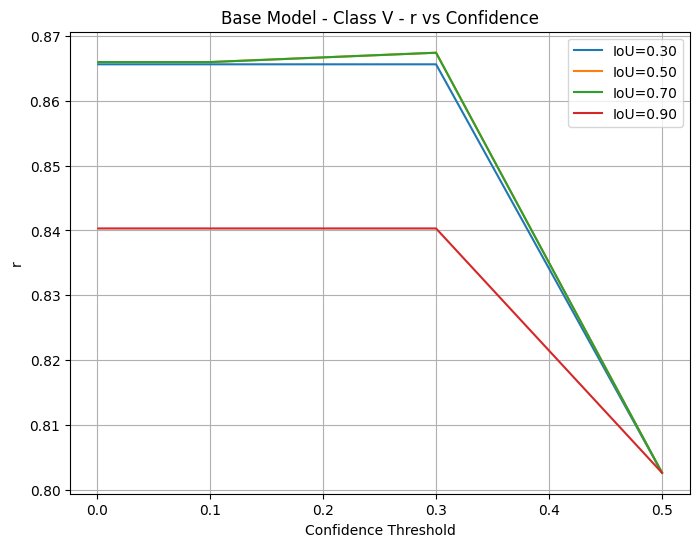

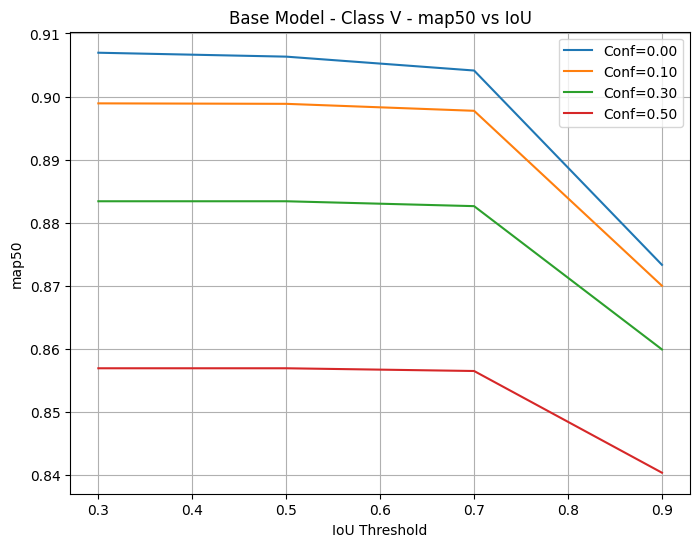

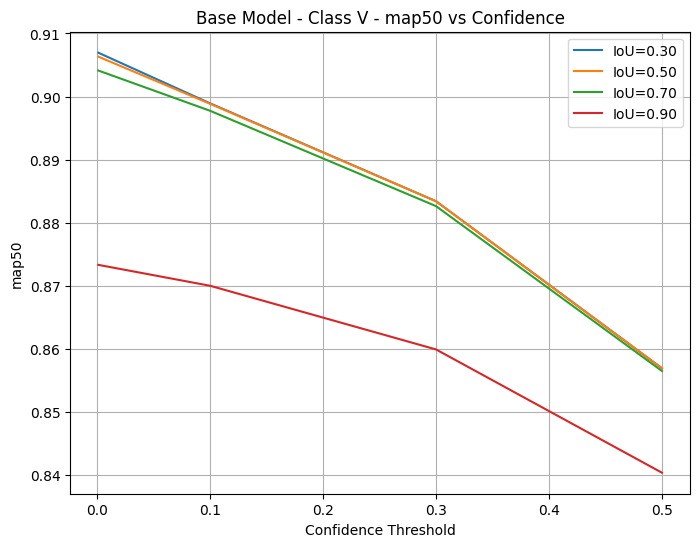

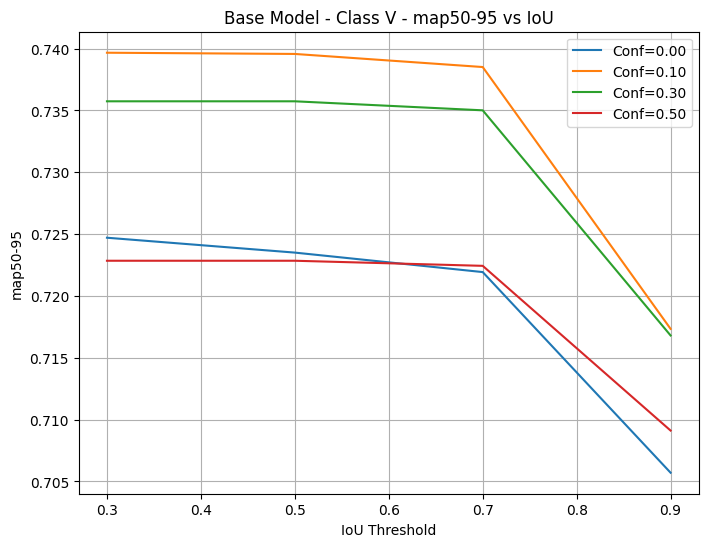

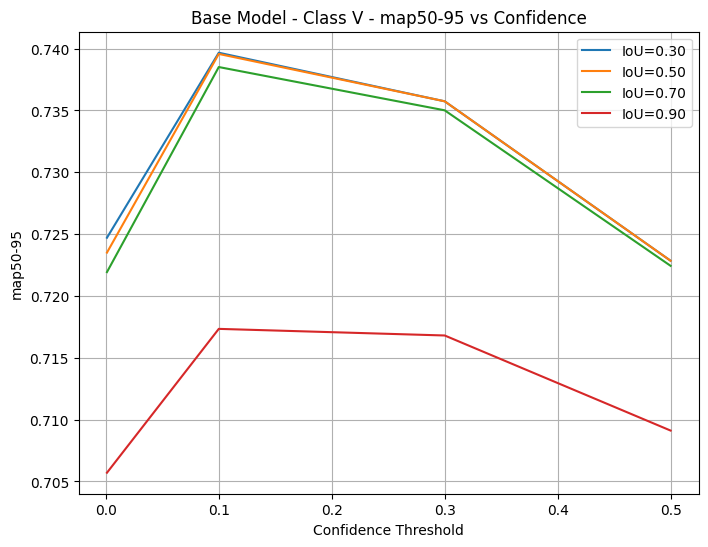

p         r     map50  map50-95       Model        Class
0  0.752702  0.789753  0.821244  0.712850  Base Model  All Classes
1  0.616660  0.661923  0.661203  0.588287  Base Model      Class C
2  0.849563  0.861895  0.922753  0.824546  Base Model      Class S
3  0.791881  0.845442  0.879776  0.725718  Base Model      Class V

In [8]:
load_and_visualize(base_model_paths, "Base Model")

# Visualizing Augmented Model

Visualizing for Augmented Model - All Classes


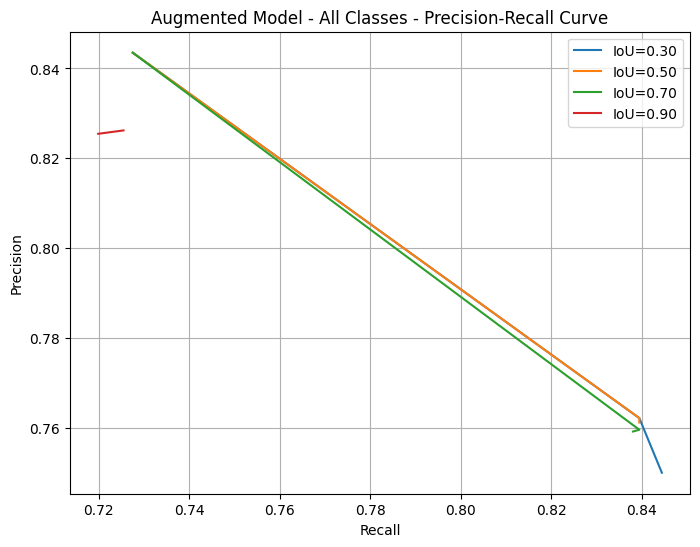

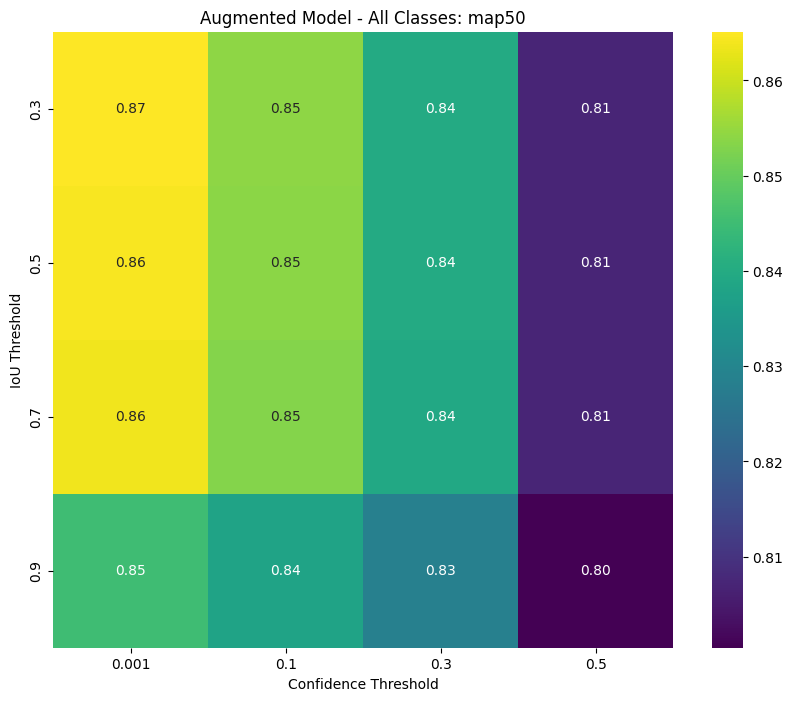

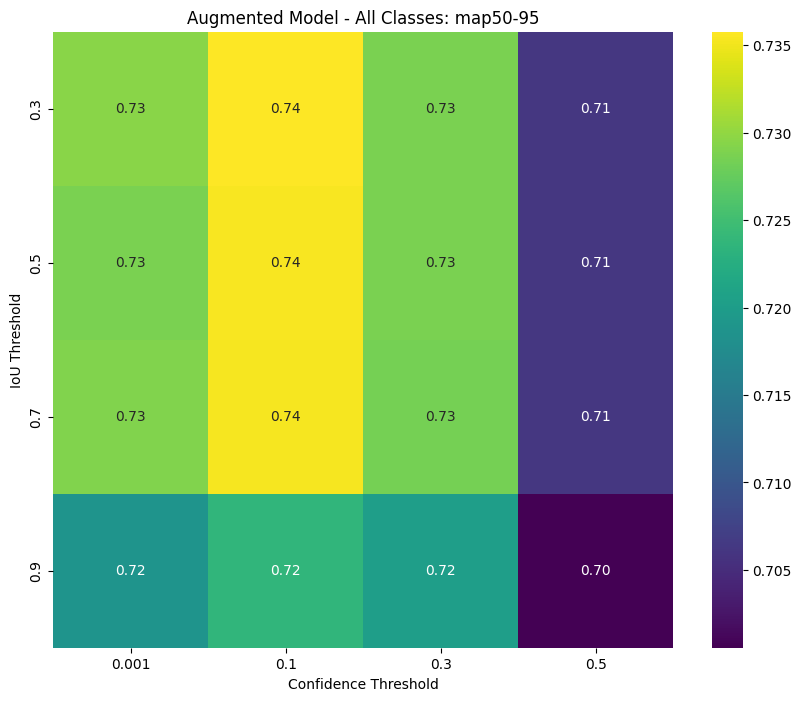

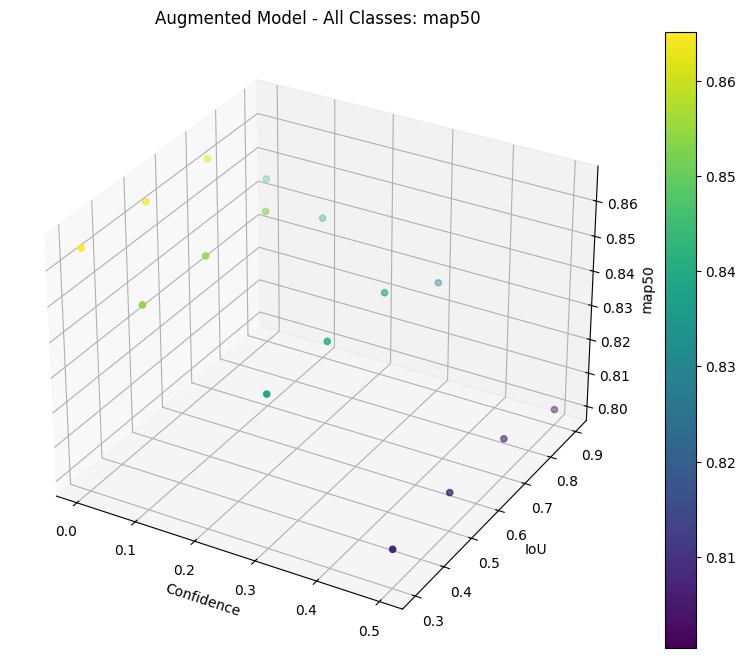

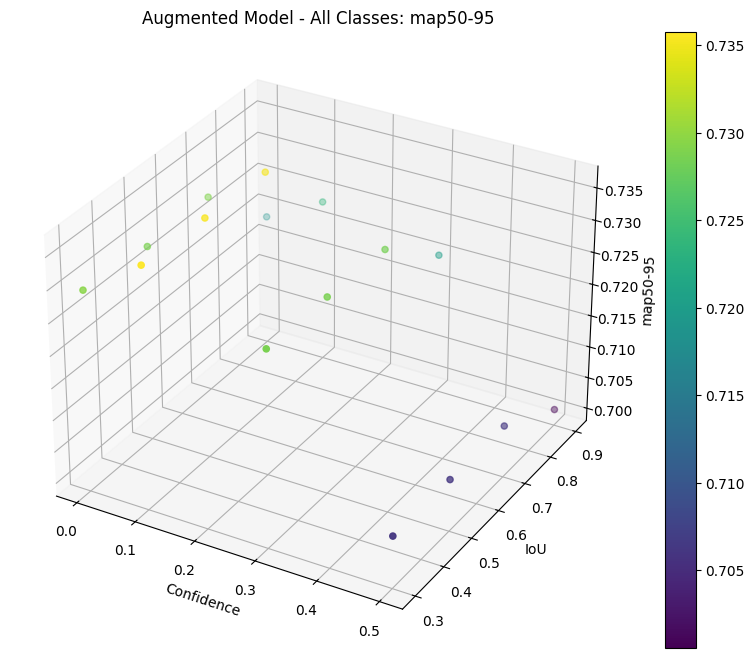

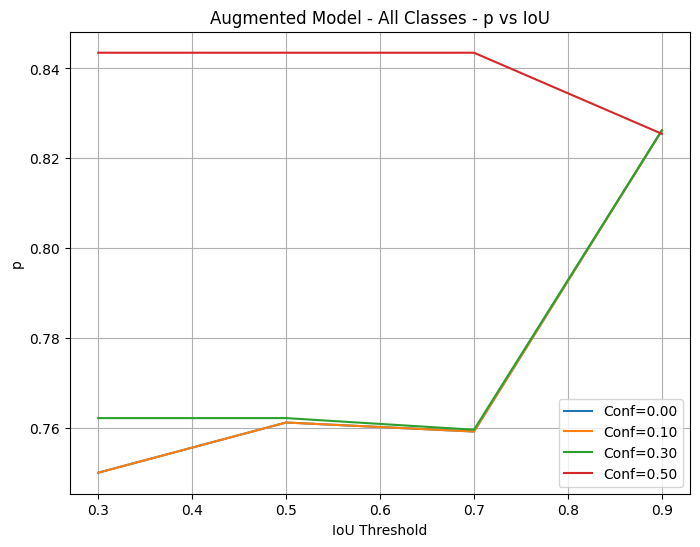

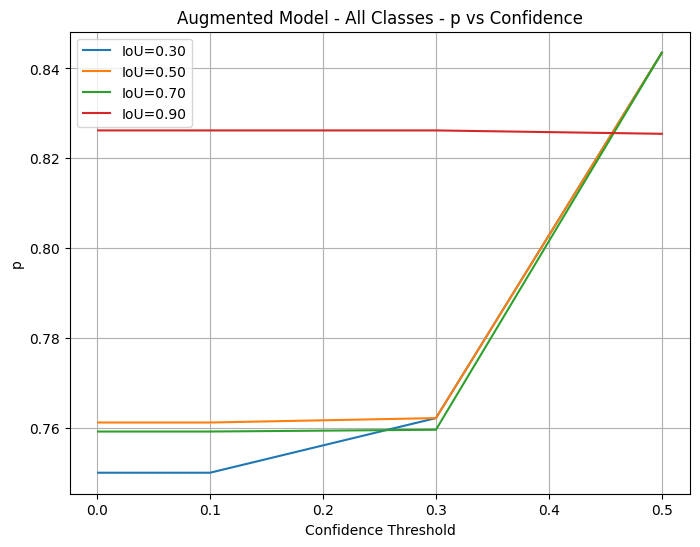

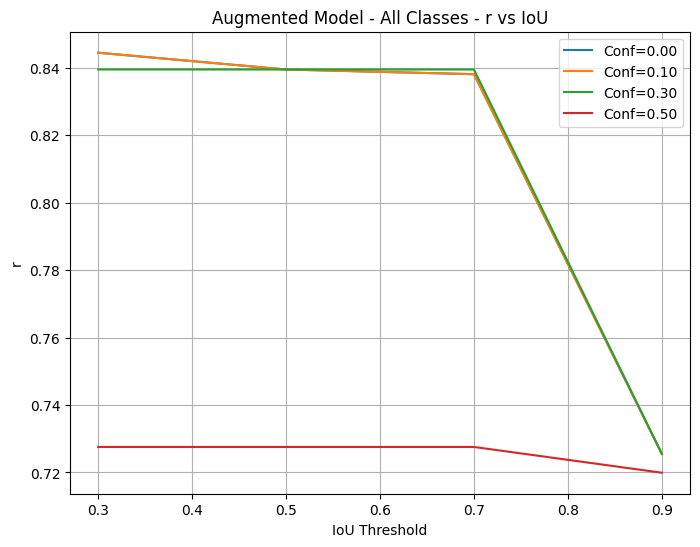

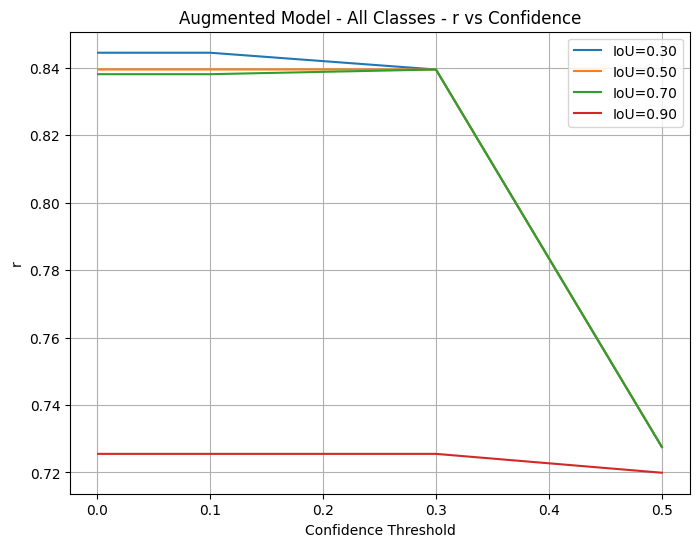

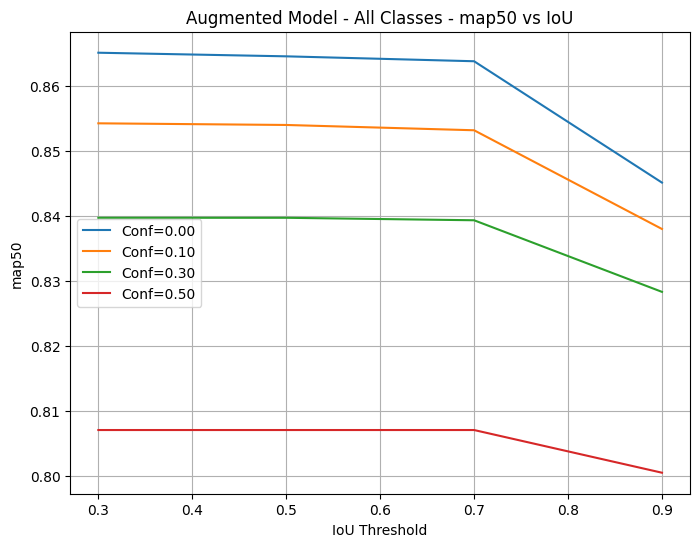

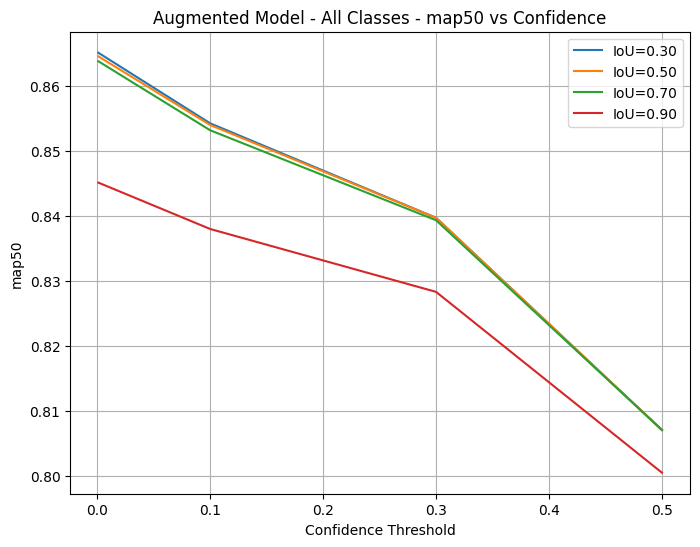

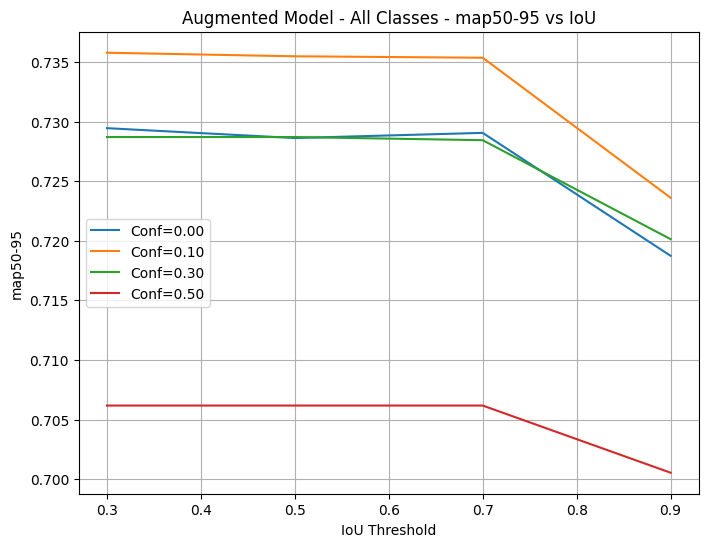

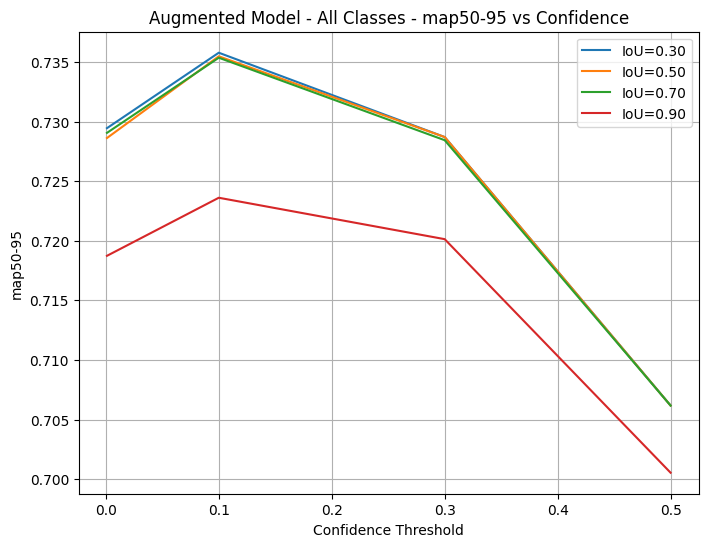

Visualizing for Augmented Model - Class C


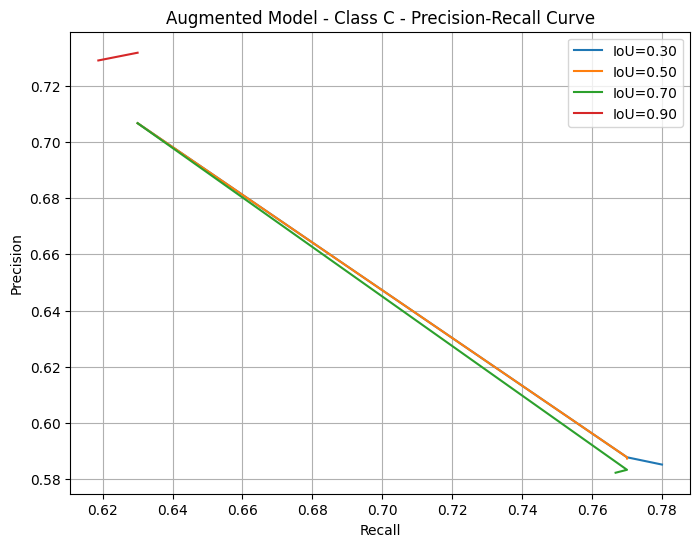

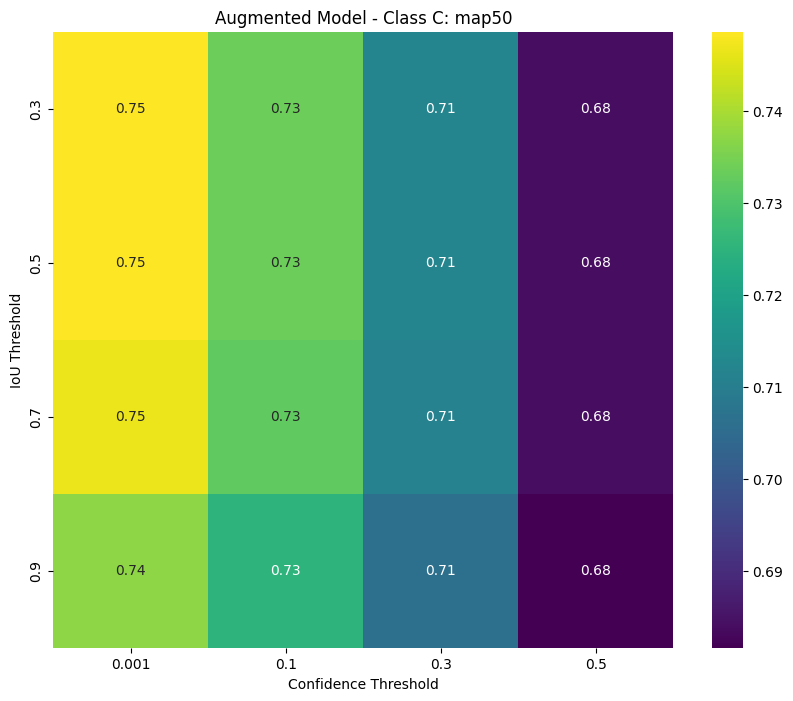

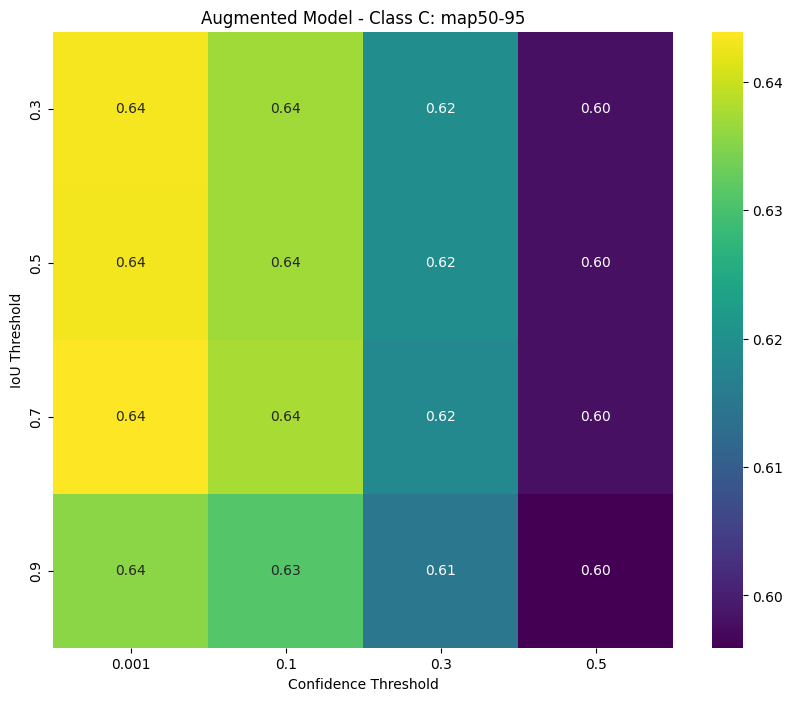

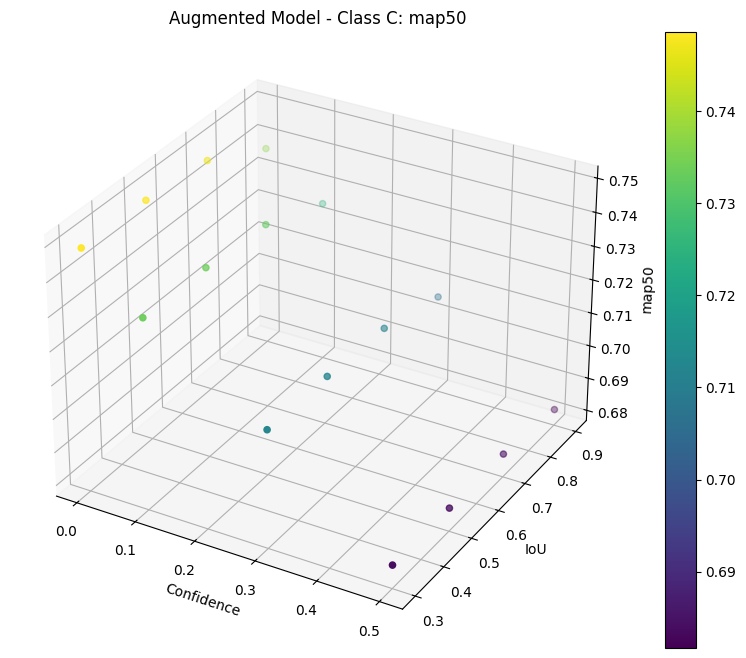

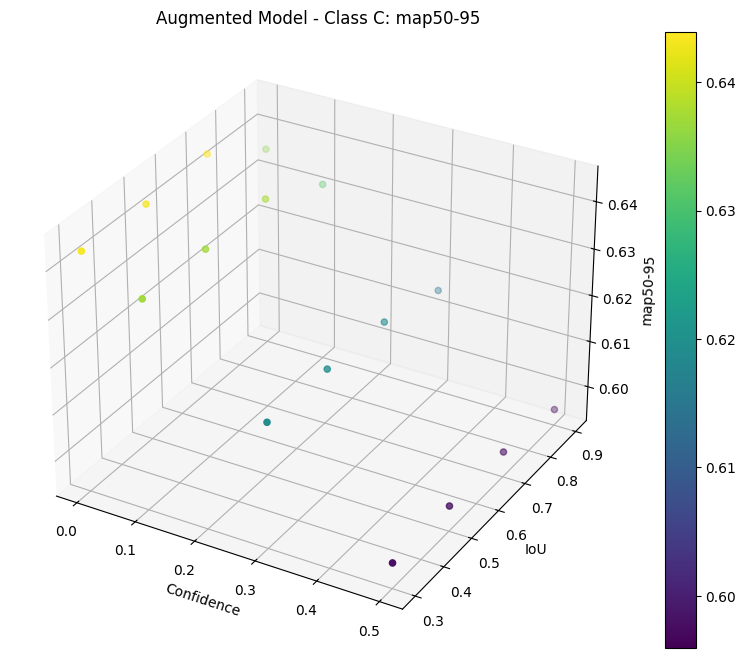

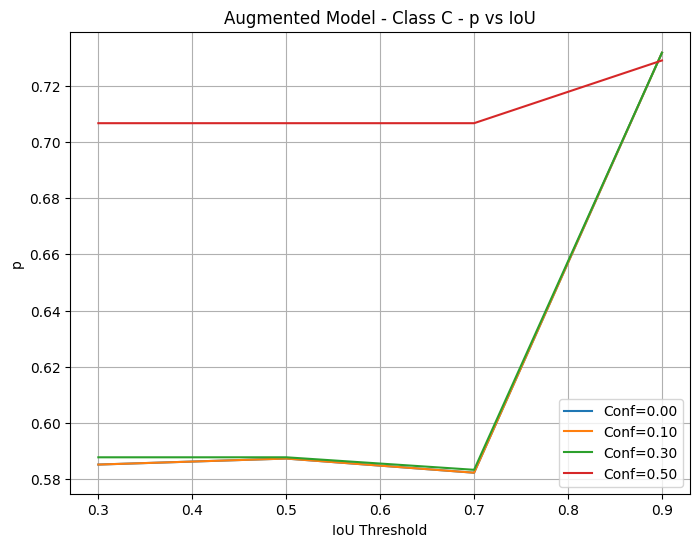

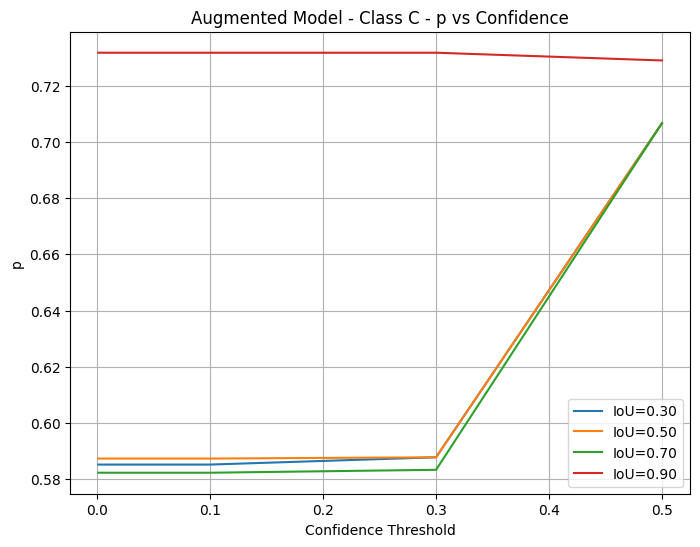

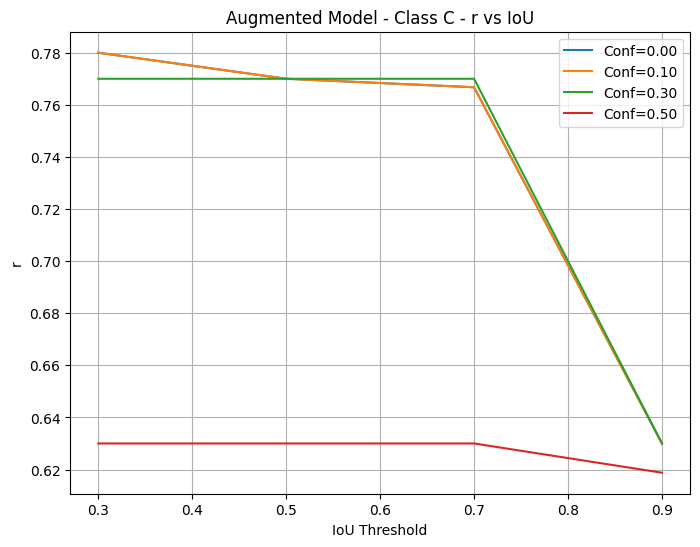

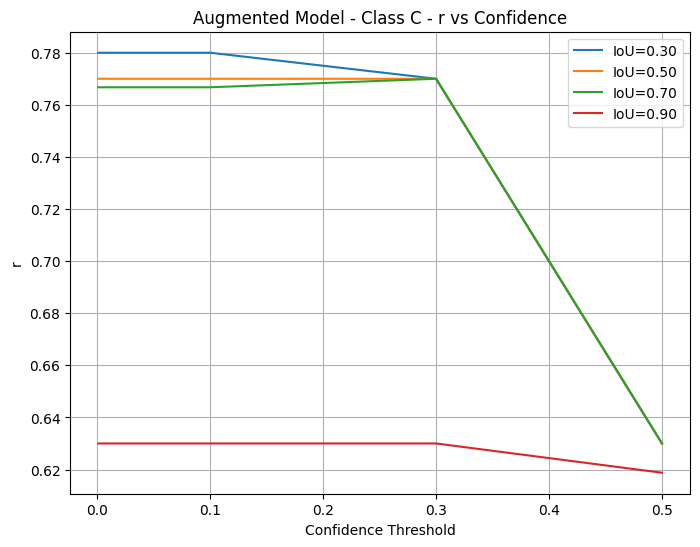

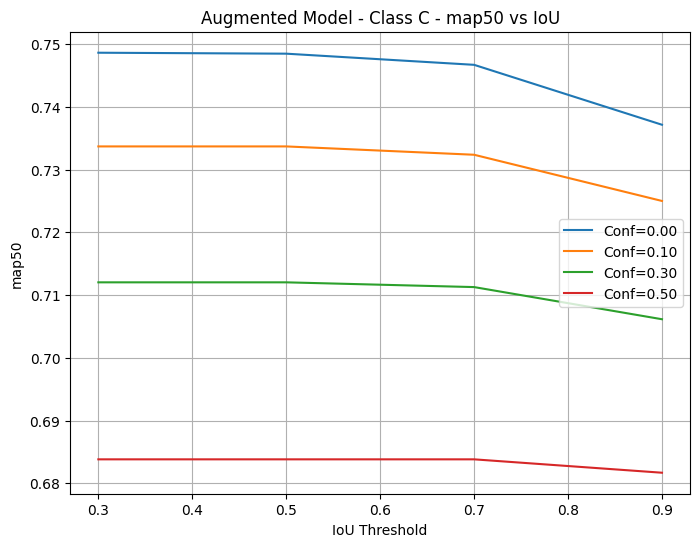

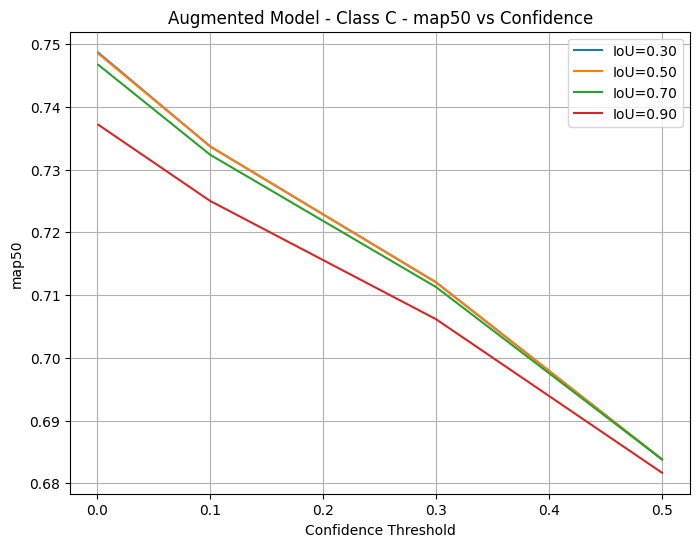

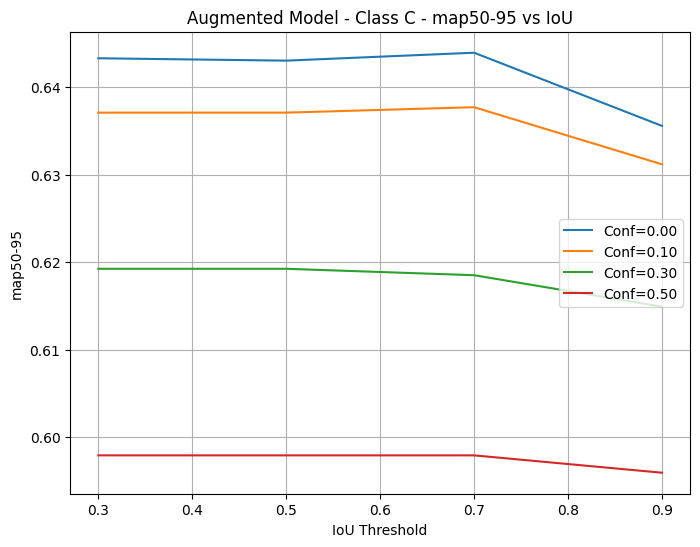

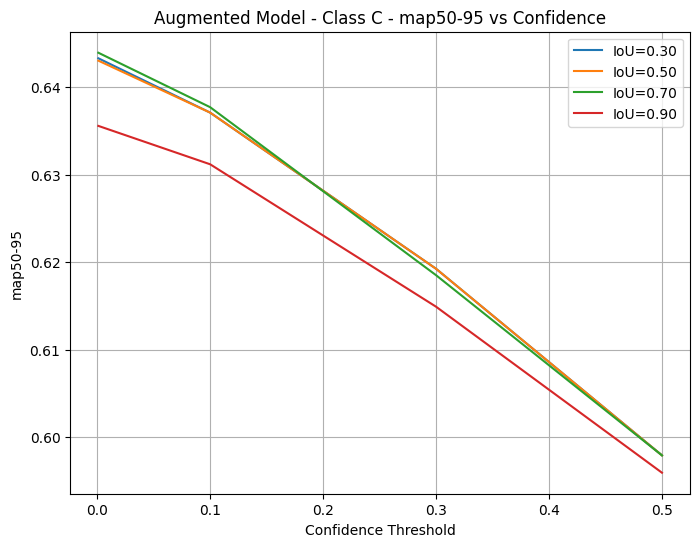

Visualizing for Augmented Model - Class S


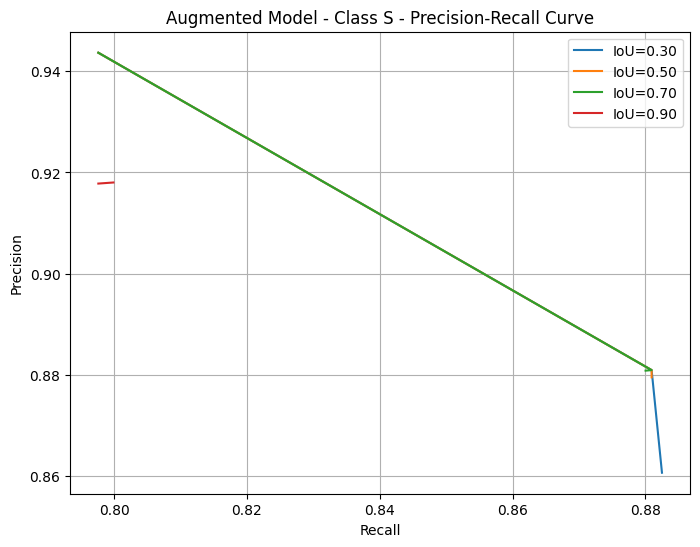

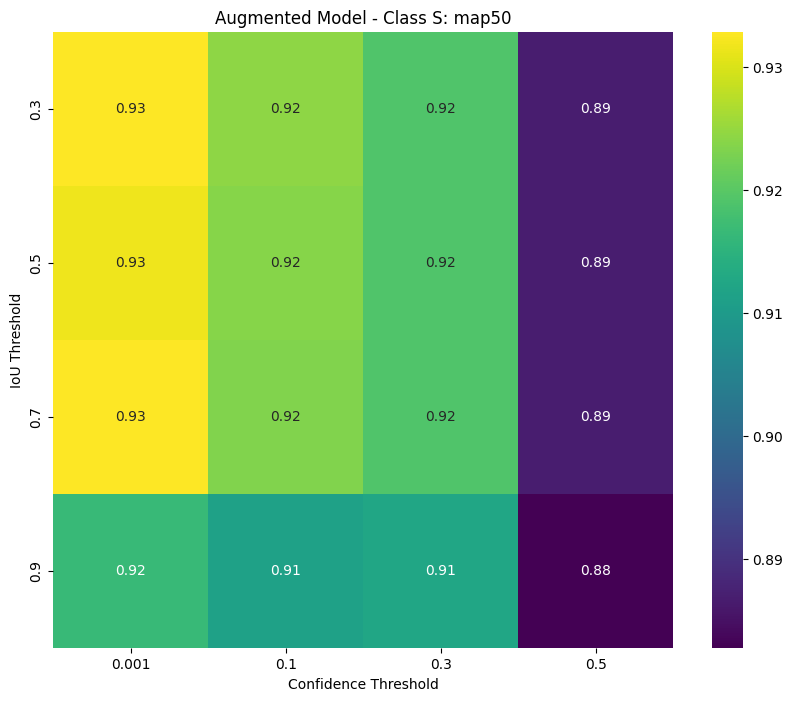

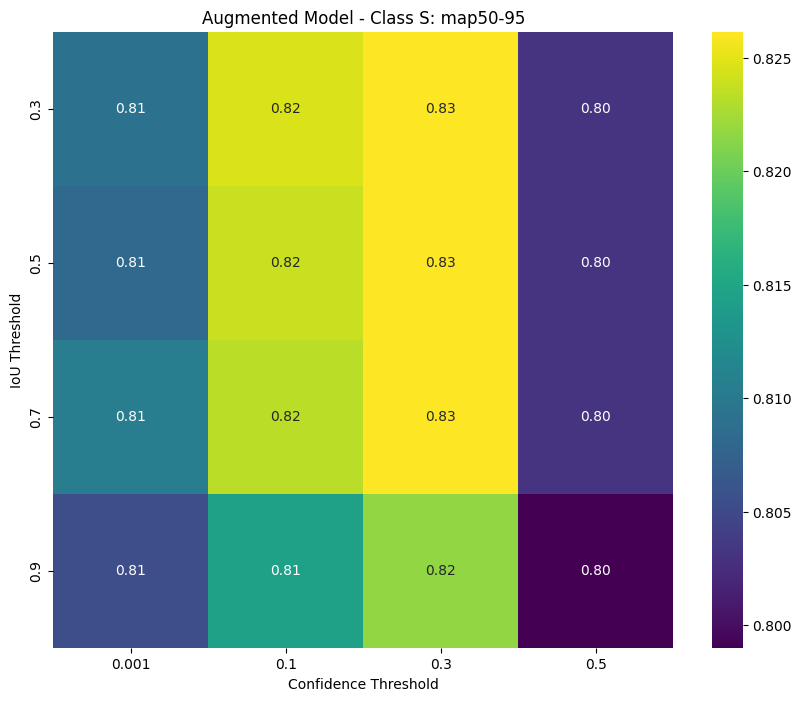

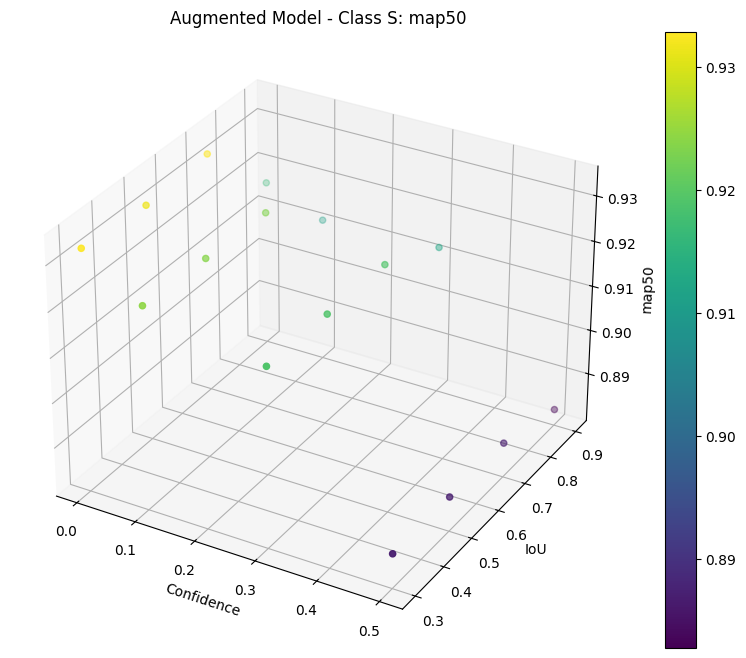

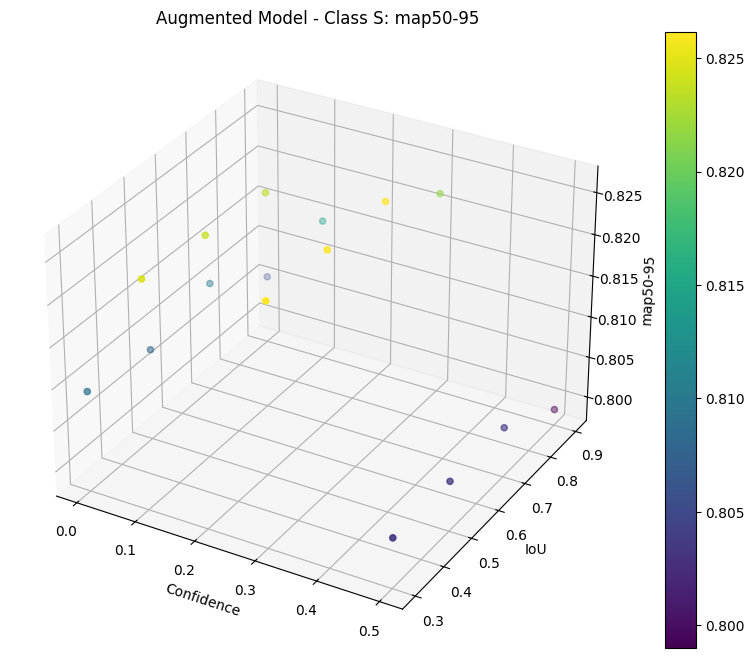

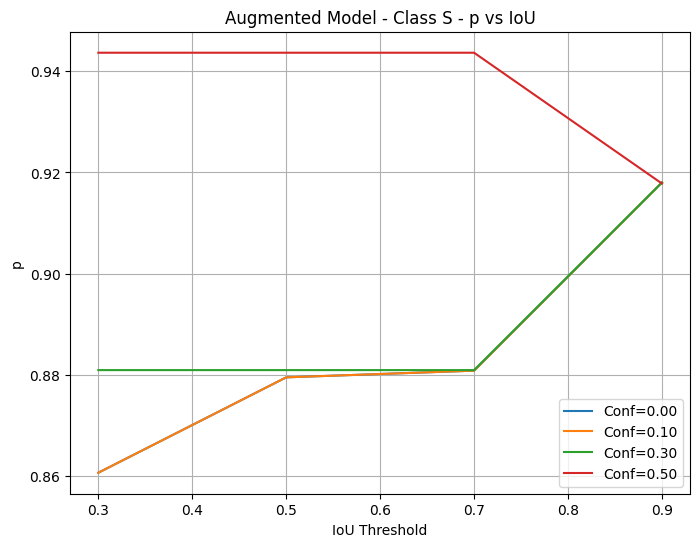

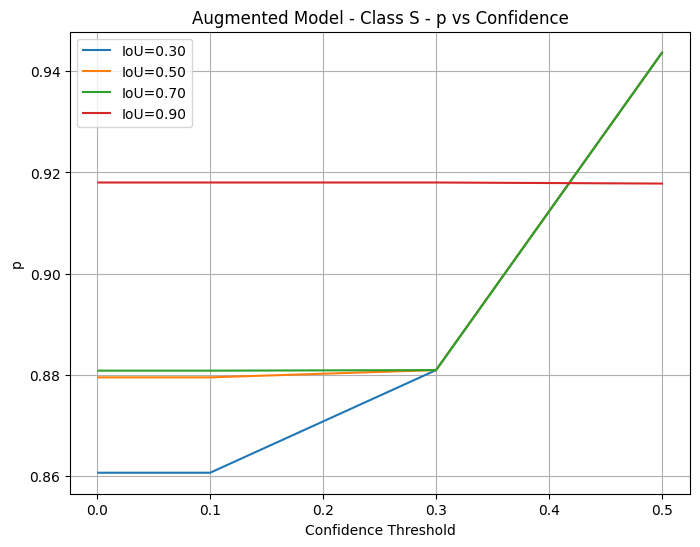

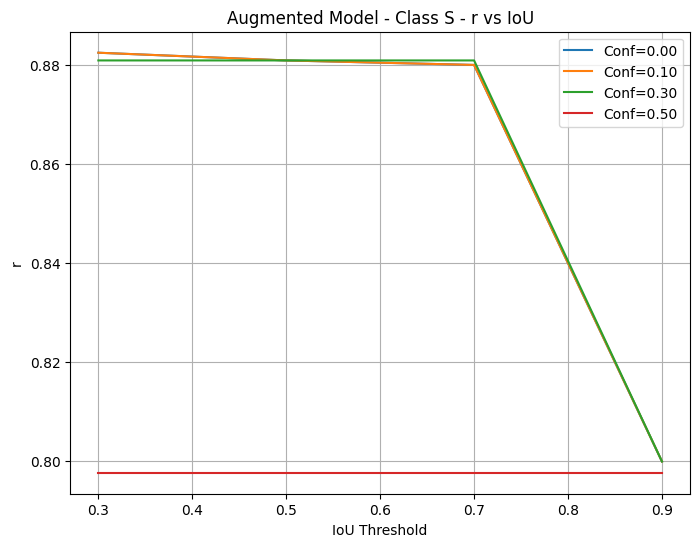

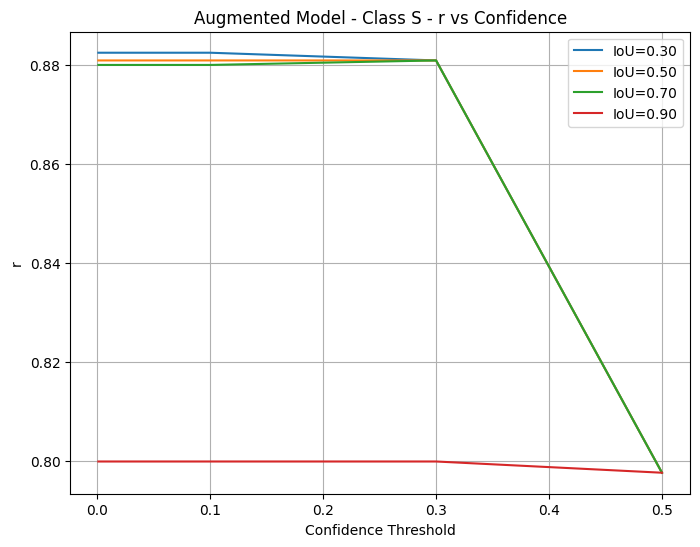

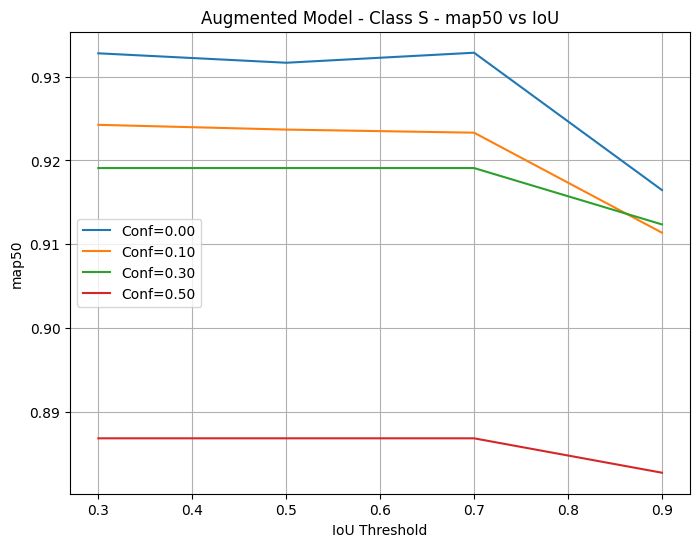

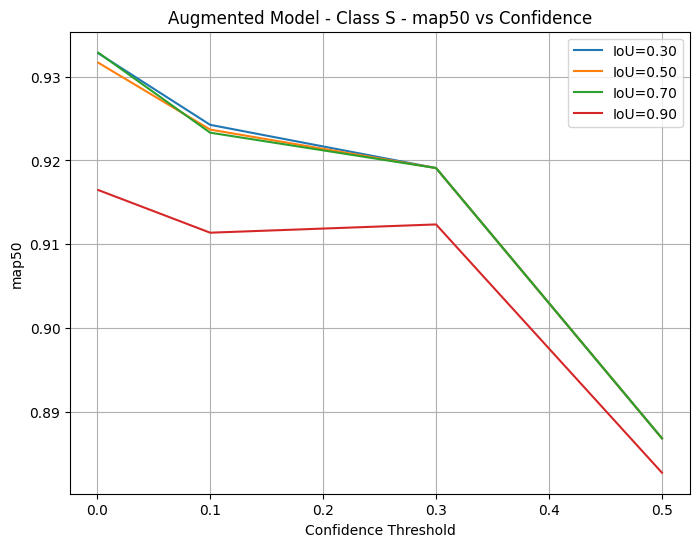

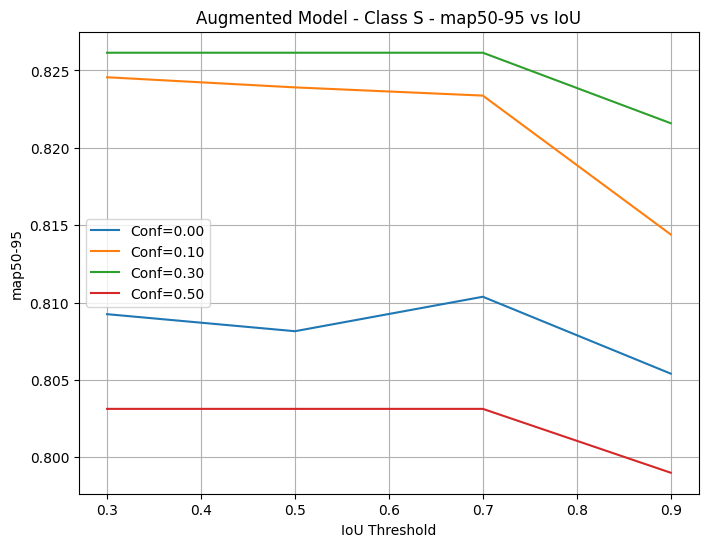

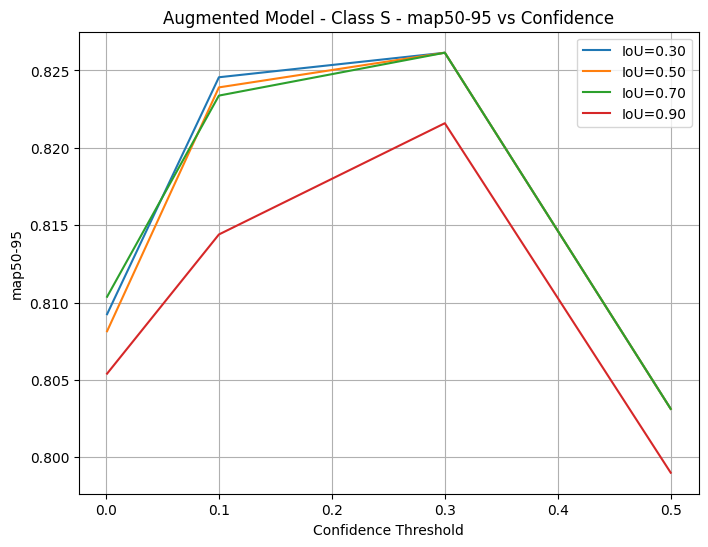

Visualizing for Augmented Model - Class V


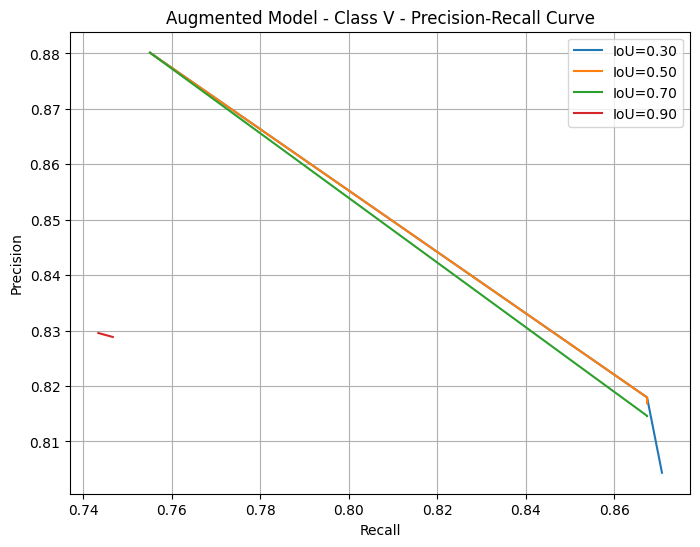

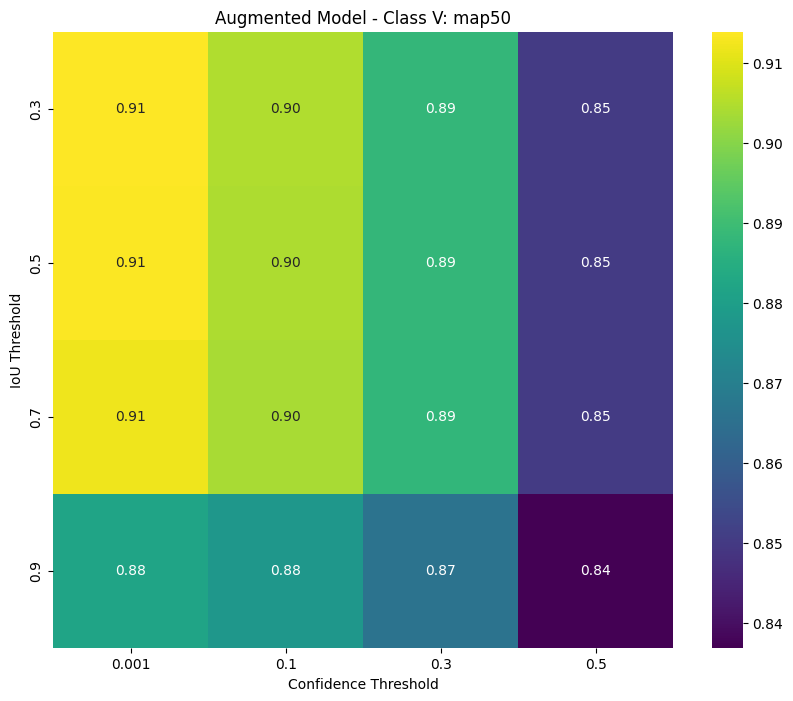

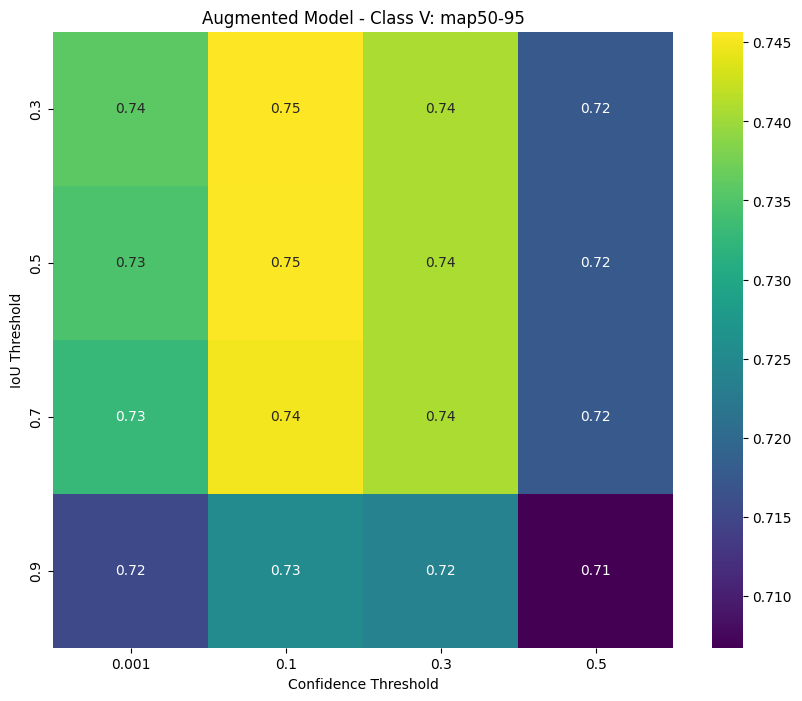

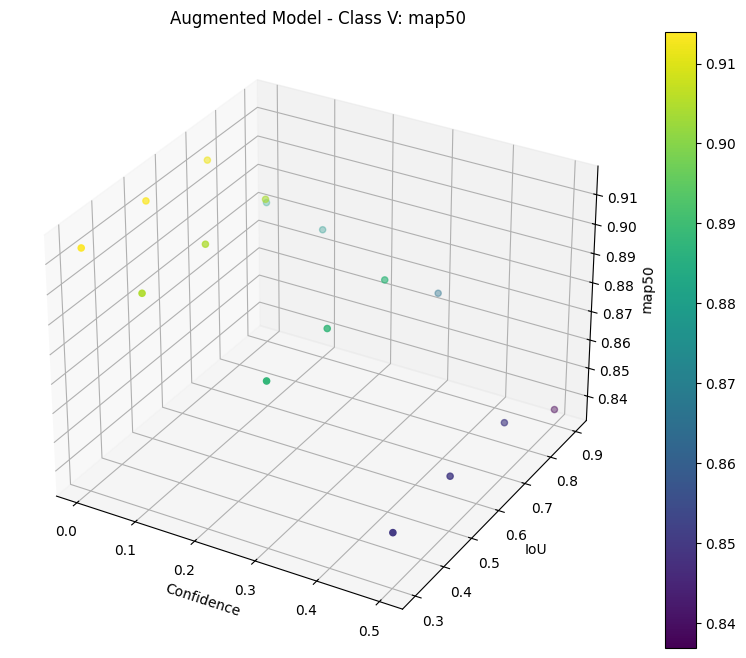

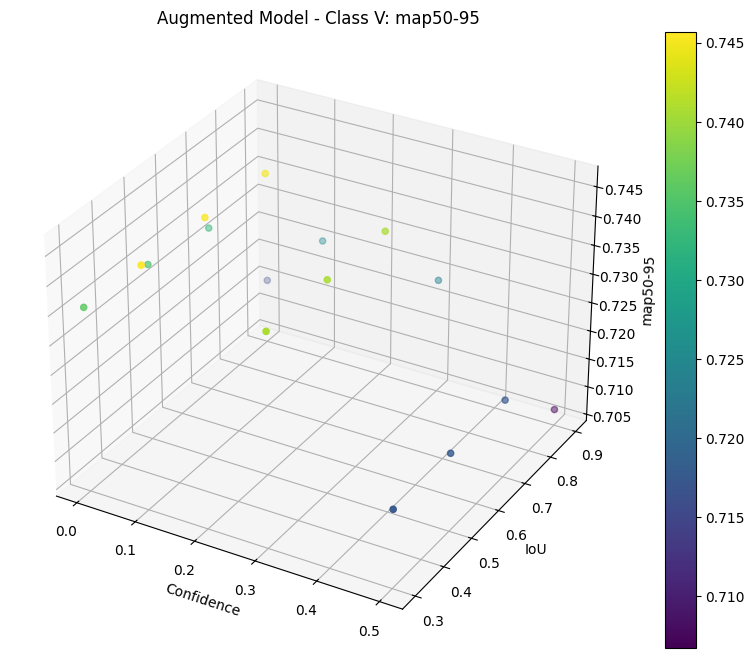

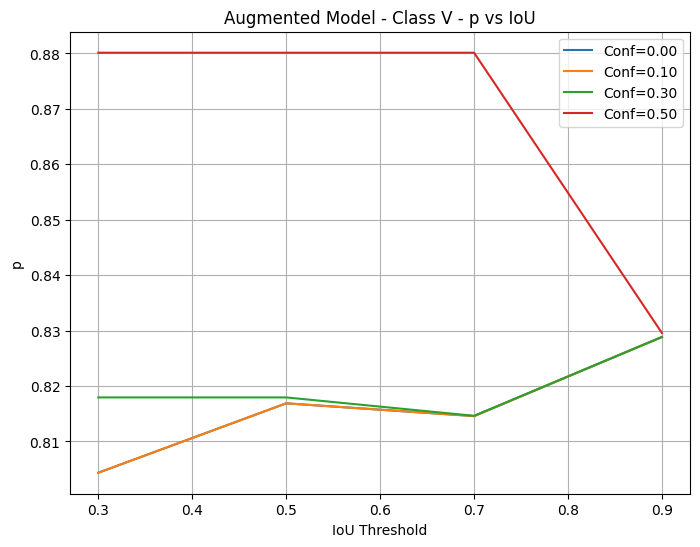

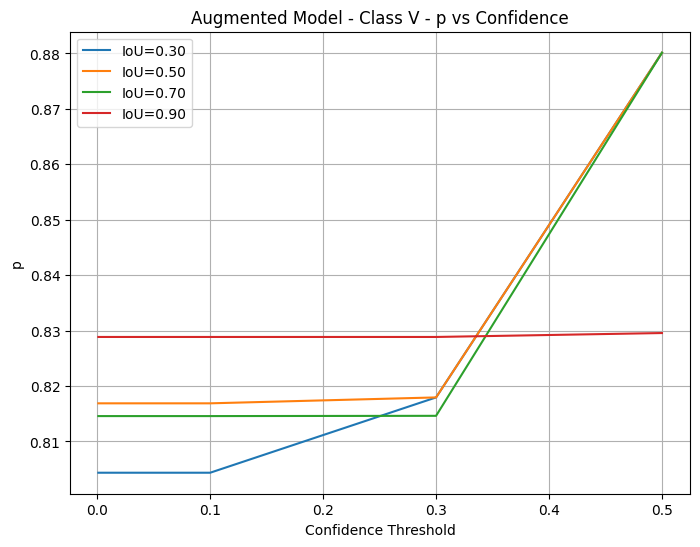

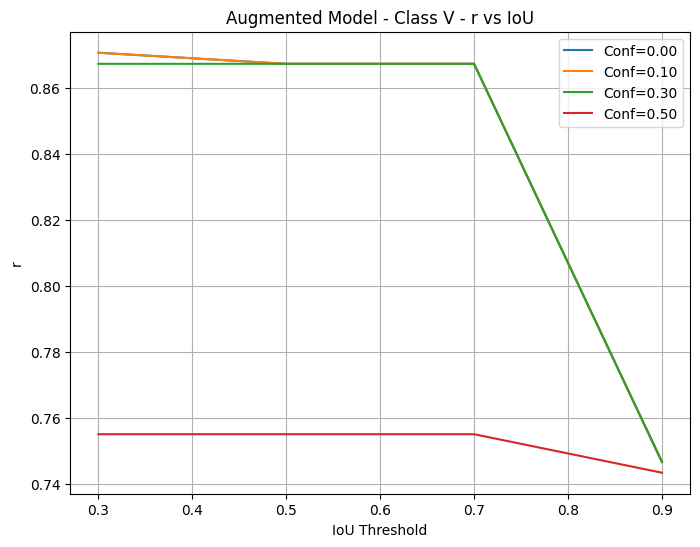

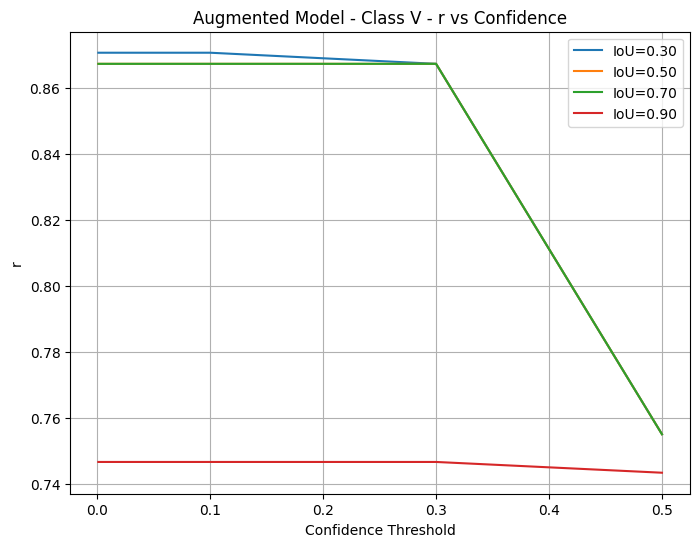

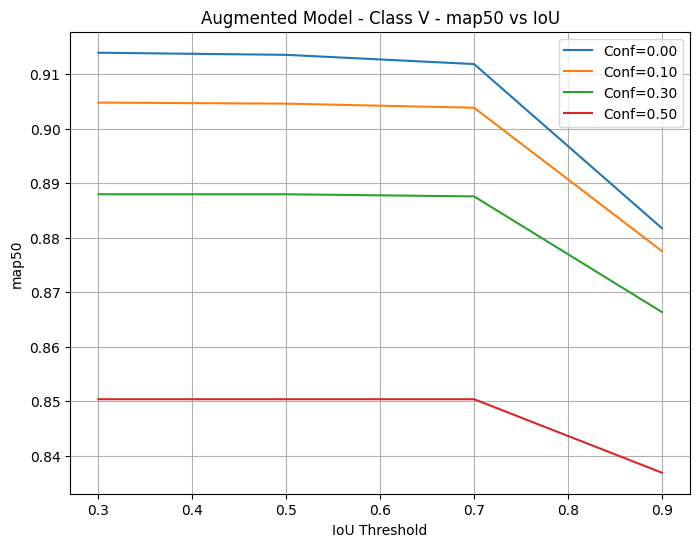

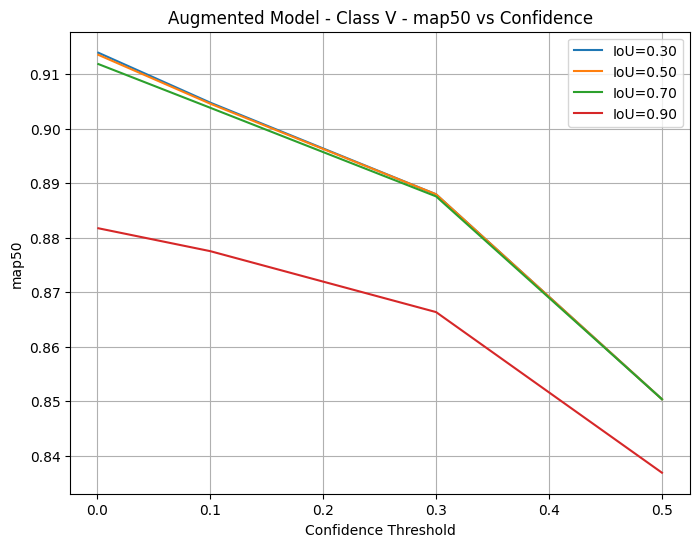

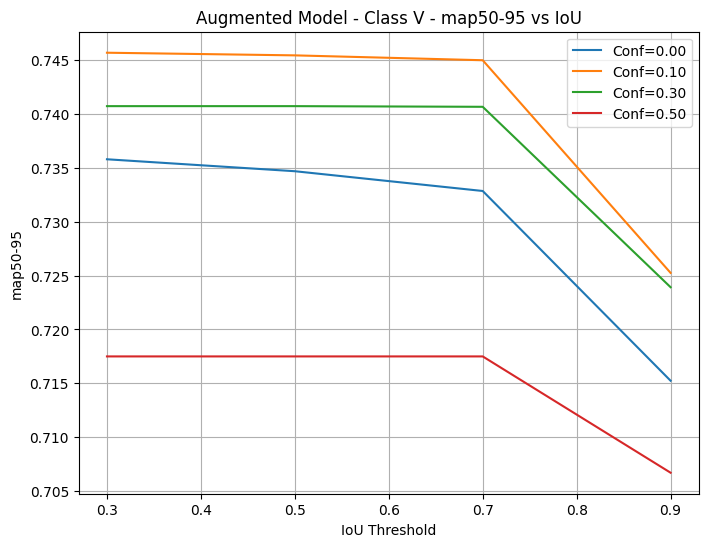

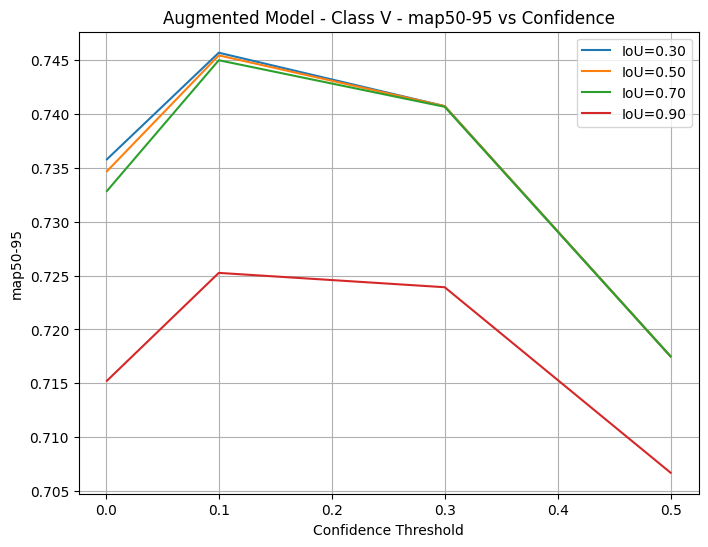

p         r     map50  map50-95            Model        Class
0  0.791235  0.790089  0.837903  0.722568  Augmented Model  All Classes
1  0.644559  0.708890  0.717524  0.623144  Augmented Model      Class C
2  0.899237  0.845001  0.913085  0.814242  Augmented Model      Class S
3  0.829908  0.816376  0.883102  0.730319  Augmented Model      Class V

In [9]:
load_and_visualize(augmented_model_paths, "Augmented Model")

# Visualizing Comparison of Models

In [12]:
# Function to load data and calculate summaries
def create_summary(paths, model_name):
    summaries = []
    for class_name, file_path in paths.items():
        data = pd.read_csv(file_path)
        avg_metrics = data[['p', 'r', 'map50', 'map50-95']].mean().to_dict()
        avg_metrics['Model'] = model_name
        avg_metrics['Class'] = class_name
        summaries.append(avg_metrics)
    return pd.DataFrame(summaries)

In [13]:
# Create summaries
base_model_summary = create_summary(base_model_paths, "Base Model")
augmented_model_summary = create_summary(augmented_model_paths, "Augmented Model")

# Combine summaries
comparison_summary = pd.concat([base_model_summary, augmented_model_summary], ignore_index=True)

# Display the combined summary table
print("Comparison Summary Table")
print(comparison_summary)

# Save summary table to CSV
comparison_summary.to_csv("comparison_summary.csv", index=False)

Comparison Summary Table
          p         r     map50  map50-95            Model        Class
0  0.752702  0.789753  0.821244  0.712850       Base Model  metrics_all
1  0.616660  0.661923  0.661203  0.588287       Base Model    metrics_c
2  0.849563  0.861895  0.922753  0.824546       Base Model    metrics_s
3  0.791881  0.845442  0.879776  0.725718       Base Model    metrics_v
4  0.791235  0.790089  0.837903  0.722568  Augmented Model  metrics_all
5  0.644559  0.708890  0.717524  0.623144  Augmented Model    metrics_c
6  0.899237  0.845001  0.913085  0.814242  Augmented Model    metrics_s
7  0.829908  0.816376  0.883102  0.730319  Augmented Model    metrics_v


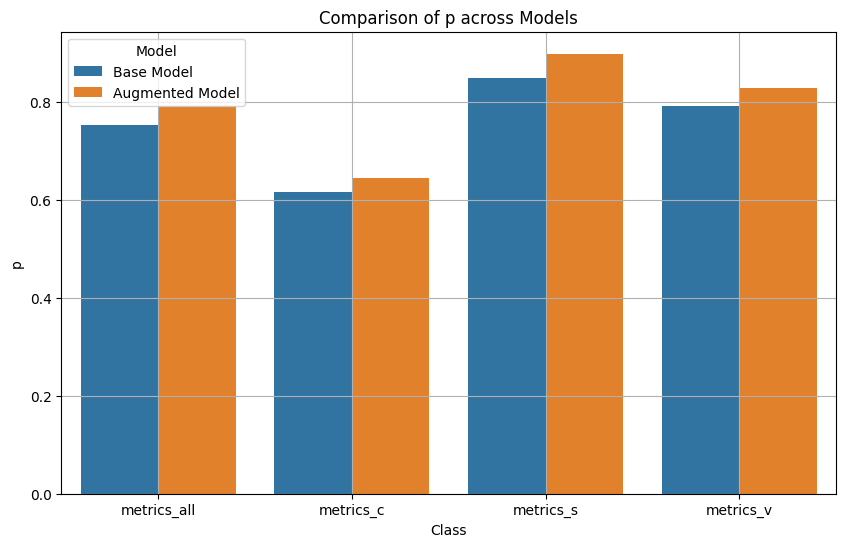

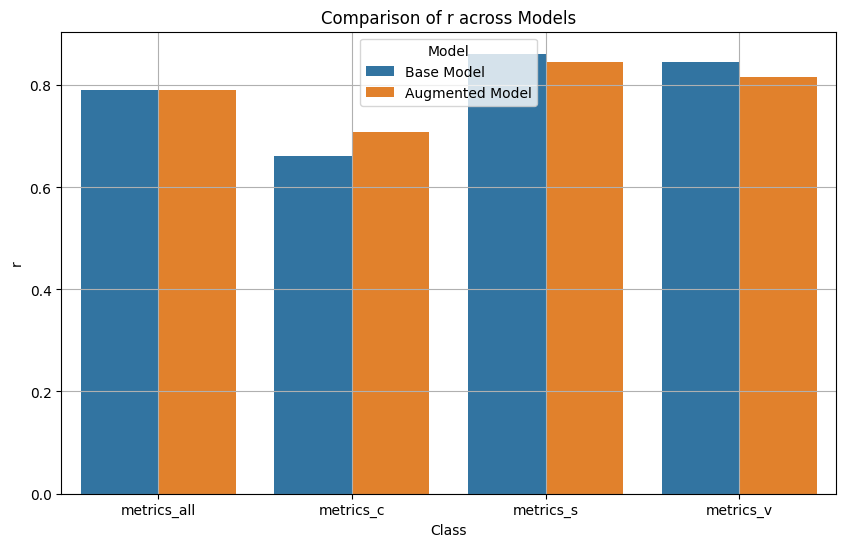

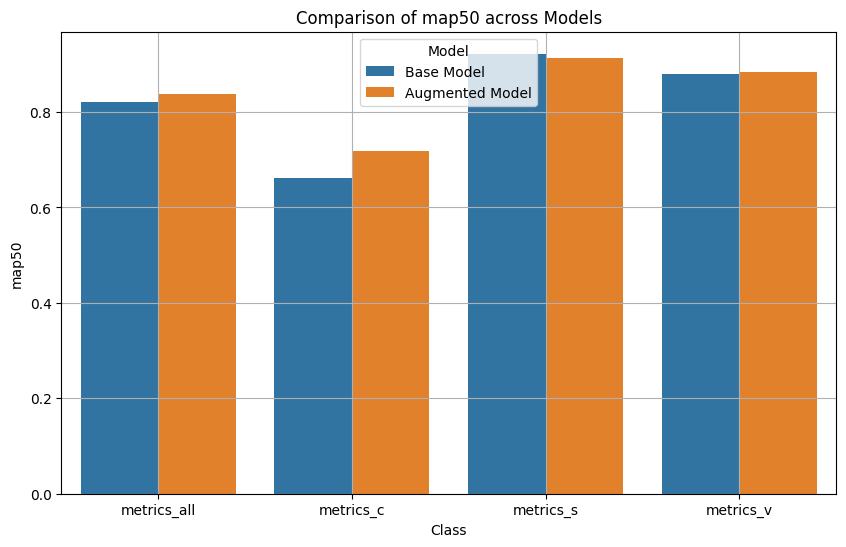

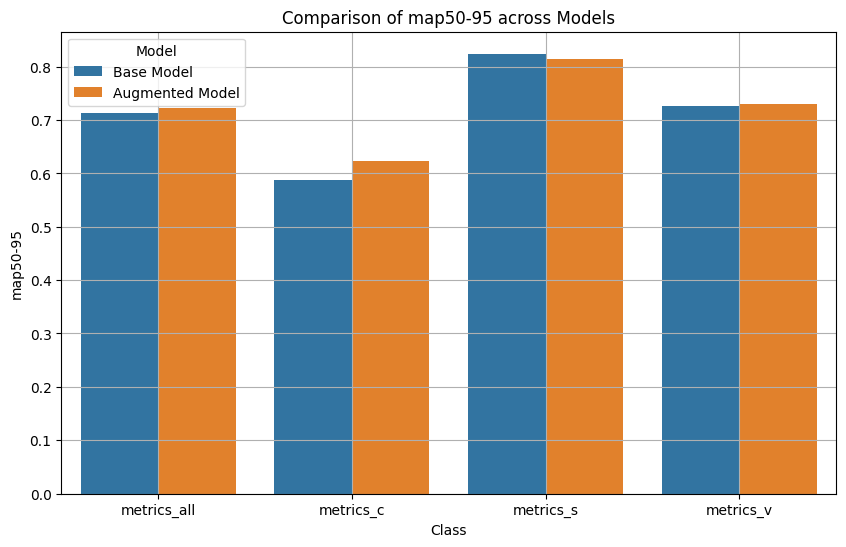

In [14]:
# Visualize comparison of metrics using bar plots
metrics_to_compare = ['p', 'r', 'map50', 'map50-95']
for metric in metrics_to_compare:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=comparison_summary, x='Class', y=metric, hue='Model')
    plt.title(f'Comparison of {metric} across Models')
    plt.ylabel(metric)
    plt.xlabel('Class')
    plt.legend(title='Model')
    plt.grid(True)
    plt.show()